<h1>PCS Data Science Workshop</h1>

Welcome to the PCS Data Science Workshop! This notebook will provide a brief overview of numerous data science techniques, many of which is covered in Data C100 (highly recommend) including
* `Python`
* `Numpy` and Vector Operations
* `pandas`, EDA, and Data Manipulation
* Visualization (`Matplotlib/Seaborn`)
* Multilinear Modeling, Data Engineering, Gradient Descent, and `Scikit-Learn`

## Table of Contents
* [**Python**](#python)
    * [Lambda Functions](#lambda)
    * [Iteration](#iteration)
    * [List Comprehensions](#lc)
* [**Vectorized Operations**](#vo)
    * [How They Work](#how-vo-works)
    * [Time Comparison (Iterated vs. Vectorized Operations)](#time-comp)
* [**pandas and DataFrames**](#pd-df)
    * [Accessing Rows, Columns, and Subsets](#df-slicing)
    * [Filtering](#filtering)
    * [Exploratory Data Analysis (EDA)](#eda)
        * [You do some EDA](#your-eda)
    * [Handling NaN and Missing Values](#nan)
    * [Merges and Joins](#merge)
* [**Visualization**](#visualization)
    * [Making Graphs Presentable](#presentable)
    * [Overplotting (And How to Avoid it)](#overplotting)
* [**Multilinear Modeling, Gradient Descent, and Data Engineering**](#regression)
    * [Simple Linear Regression](#slr)
    * [Model Evaluation](#rmse)
    * [Error Minimization (Gradient Descent)](#gd)
    * [Multiple Linear Regression (OLS)](#ols)
    * [Overfitting](#overfitting)
    * [Validation](#validation)

#### First, Let's do Some Top Level Imports

In [108]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Data Training
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Other things you may need
import os
import asyncio
import aiohttp
import time

# Turning warnings off
import warnings
warnings.simplefilter("ignore")

<h1 id="python"><a class="anchor" id="python">Python</a></h1>

Python is the (arguably) the most important language used for data science, and most of the low level work you do will be in the Jupyter environment (which was developed by Cal's own professor, Fernando Perez!)

Here are some important concepts to know

<h3><a class="anchor" id="lambda">Lambda Functions</a></h3>

In [2]:
# A function which returns x squared
lambda x: x ** 2

# A function which determines if a string has the word "at"
lambda x: "at" in x

# A function which finds if the percent of people who have a disability is greater than 20%
lambda x: (x["Disability"] / x["Total Population"]) > 0.2;

<h3><a class="anchor" id="iteration">Iteration</a></h3>

In [3]:
lst1 = ["hello", "this", "is"]
lst2 = ["a", "great", "workshop"]

# A for loop counter
for i in range(len(lst1)):
    print(lst1[i])

# A for each loop
for word in lst2:
    print(word)

hello
this
is
a
great
workshop


<h3><a class="anchor" id="lc">List Comprehensions</a></h3>

In [4]:
# Checks if the words in list 1 and 2 have a length greater than 4
[len(word) > 4 for word in lst1 + lst2]

[True, False, False, False, True, True]

<h1><a class="anchor" id="vo">Vectorized Operations</a></h1>

In [5]:
def current_time():
    return int(time.time() * 1000)  # Get current time in milliseconds

When manipulating large amounts of data, it becomes slower and slower to iterate through every value to transform it... let's do a test

In [6]:
for length in [10, 1000, 100000, 1000000, 10000000]:
    t = current_time()
    result = [x ** 2 + 1 for x in range(length)]
    elapsed_time = current_time() - t
    print(f"Iterating through {length} values took {elapsed_time} milliseconds")

Iterating through 10 values took 0 milliseconds
Iterating through 1000 values took 0 milliseconds
Iterating through 100000 values took 47 milliseconds
Iterating through 1000000 values took 442 milliseconds
Iterating through 10000000 values took 4460 milliseconds


To solve this, we can "vectorize" our operations using libraries like `Numpy` and `pandas`, which takes advantage of parallelism/multithreading to efficiently apply operations to large quantities of data

In [7]:
for length in [10, 1000, 100000, 1000000, 10000000]:
    t = current_time()
    result = np.arange(length) ** 2
    elapsed_time = current_time() - t
    print(f"Iterating through {length} values took {elapsed_time} milliseconds")

Iterating through 10 values took 169 milliseconds
Iterating through 1000 values took 0 milliseconds
Iterating through 100000 values took 1 milliseconds
Iterating through 1000000 values took 4 milliseconds
Iterating through 10000000 values took 34 milliseconds


<h3><a class="anchor" id="time-comp">Time Comparison (Iterated vs. Vectorized Operations)</a></h3>

As you can see, vectorized operations may be slower at first, but are significantly more efficient when operating on millions of values

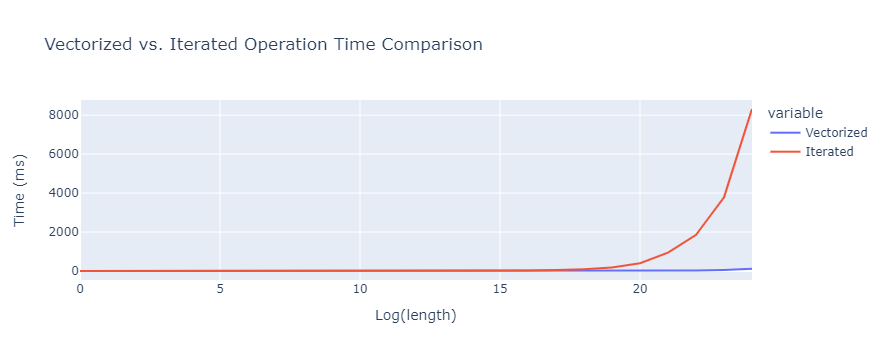

In [8]:
# Create an empty DataFrame to store the times
vectorized_vs_iterated = pd.DataFrame({"Log (length)": [], "Vectorized": [], "Iterated": []})

for length in np.arange(25):
    
    # Vectorized Operation Time
    t = current_time()
    vectorized_result = np.arange(2 ** length) ** 2 + 5
    vectorized_time = current_time() - t

    # Iterated Operation Time
    t = current_time()
    iterated_result = [x ** 2 + 5 for x in range(2 ** length)]
    iterated_time = current_time() - t

    vectorized_vs_iterated = vectorized_vs_iterated.append({"Log (length)": length, "Vectorized": vectorized_time, "Iterated": iterated_time}, ignore_index=True)

# Create a line plot using Plotly
fig = px.line(vectorized_vs_iterated, x="Log (length)", y=["Vectorized", "Iterated"], labels={"Log (length)": "Log(length)", "value": "Time (ms)"}, title="Vectorized vs. Iterated Operation Time Comparison")
fig.show()

<h3><a class="anchor" id="how-vo-works">How Vectorized Operations Actually Work</a></h3>

Using `Numpy`, we can create an `array` and apply functions directly to them like a string or number. In `pandas`, a `Series` will do the trick

In [9]:
# Using iteration
python_list = range(5)
print(f"Python List Squared: {[x ** 2 for x in python_list]}")

# Using numpy arrays
numpy_array = np.arange(5)
# (Alternatively, you could run numpy_array = np.array(python_list) to turn a list into an array
print(f"Numpy Array Squared: {numpy_array ** 2}")

# Using pandas Series
pandas_series = pd.Series(range(5))
print(f"Pandas Series Squared: \n{pandas_series ** 2}");

# As you can see, both the series and the array have vectorized operations

Python List Squared: [0, 1, 4, 9, 16]
Numpy Array Squared: [ 0  1  4  9 16]
Pandas Series Squared: 
0     0
1     1
2     4
3     9
4    16
dtype: int64


If we want to slice a list of strings

In [10]:
pandas_series_str = pd.Series(["Hello", "I", "Will", "Be", "Sliced"])
pandas_series_str.str[0]

0    H
1    I
2    W
3    B
4    S
dtype: object

If we want to find the ones with length greater than 5

In [11]:
pandas_series_str.str.len() > 5

0    False
1    False
2    False
3    False
4     True
dtype: bool

This will be very useful for later when it comes to EDA

If you don't know how to do an operation, look at the documentation for these types of things:

[pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

[pandas.Series.str](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html)

[Numpy.Array](https://numpy.org/doc/stable/reference/arrays.html)

<h1><a class="anchor" id="pd-df">pandas and DataFrames</a></h1>

Here, we load a dataset containing information about all registered electric vehicles in Washington state

Usually, data like this is stored in a `.csv` file, and can be read by `pandas` using `pd.read_csv(f'{route}')`

This turns it into a table, which we call a `DataFrame`

In [12]:
ev_data = pd.read_csv('./Electric_Vehicle_Population_Data.csv')
ev_data

VIN (1-10)    County        City State  Postal Code  Model Year  \
0       5UXTA6C05P    Yakima      Yakima    WA      98903.0        2023   
1       5YJRE11B48       NaN         NaN    BC          NaN        2008   
2       5YJSA1E24G      King     Seattle    WA      98103.0        2016   
3       1N4AZ1CP5J      King   Shoreline    WA      98177.0        2018   
4       5YJ3E1EA6J    Island  Coupeville    WA      98239.0        2018   
...            ...       ...         ...   ...          ...         ...   
153825  1N4AZ0CP0D  San Juan   Eastsound    WA      98245.0        2013   
153826  5YJSA1E27H   Spokane     Spokane    WA      99223.0        2017   
153827  1G1FW6S03P      King      Seatac    WA      98188.0        2023   
153828  3FMTK3SU1M      King        Kent    WA      98031.0        2021   
153829  1N4AZ0CP0D    Pierce      Tacoma    WA      98407.0        2013   

             Make           Model                   Electric Vehicle Type  \
0             BMW              X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1           TESLA        ROADSTER          Battery Electric Vehicle (BEV)   
2           TESLA         MODEL S          Battery Electric Vehicle (BEV)   
3          NISSAN            LEAF          Battery Electric Vehicle (BEV)   
4           TESLA         MODEL 3          Battery Electric Vehicle (BEV)   
...           ...             ...                                     ...   
153825     NISSAN            LEAF          Battery Electric Vehicle (BEV)   
153826      TESLA         MODEL S          Battery Electric Vehicle (BEV)   
153827  CHEVROLET         BOLT EV          Battery Electric Vehicle (BEV)   
153828       FORD  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   
153829     NISSAN            LEAF          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              30   
1                 Clean Alternative Fuel Vehicle Eligible             220   
2                 Clean Alternative Fuel Vehicle Eligible             210   
3                 Clean Alternative Fuel Vehicle Eligible             151   
4                 Clean Alternative Fuel Vehicle Eligible             215   
...                                                   ...             ...   
153825            Clean Alternative Fuel Vehicle Eligible              75   
153826            Clean Alternative Fuel Vehicle Eligible             210   
153827  Eligibility unknown as battery range has not b...               0   
153828  Eligibility unknown as battery range has not b...               0   
153829            Clean Alternative Fuel Vehicle Eligible              75   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  14.0       227153587   
1           98950                   NaN       143609049   
2               0                  43.0       187728201   
3               0                  32.0       249867971   
4               0                  10.0       223792649   
...           ...                   ...             ...   
153825          0                  40.0       154379130   
153826          0                   6.0       204991475   
153827          0                  33.0       244720059   
153828          0                  33.0       186104215   
153829          0                  27.0       153724504   

                       Vehicle Location  \
0         POINT (-120.477805 46.553505)   
1                                   NaN   
2          POINT (-122.34301 47.659185)   
3          POINT (-122.382425 47.77279)   
4       POINT (-122.6880708 48.2179983)   
...                                 ...   
153825   POINT (-122.907229 48.7016716)   
153826     POINT (-117.369705 47.62637)   
153827      POINT (-122.29179 47.43473)   
153828  POINT (-122.2012521 47.3931814)   
153829  POINT (-122.5113356 47.2923828)   

                               

There could be a few things we want to do with this data... but in particular, we will take the time to answer the following questions:
* How many of each "make" is there?
* How many of each specific "make" and "model" are there?
* How do we handle missing data?
* How does the "Electric Range" compare for different "makes"

<h3><a class="anchor" id="df-slicing">Accessing Rows, Columns, and Subsets</a></h3>

#### The Slicing Operator

The most basic and widely used operator for DataFrames is the slicing operator: `[]`

There are a few things we can do with this:

##### Columns

* Get a column as a Series: `df['column_name']`
* Get a column as a DataFrame: `df[['column_name']]`
* Get multiple columns: `df[['column_name_1', 'column_name_2']]`

##### Rows

* Slice from m to n rows: `df[m:n]`
* Get only rows with a `True` value (**important**): `df[[True, False, True, True... False, True]]`

Let's look at how we can use these operations

In [13]:
# Getting a series
ev_data["Make"]

0               BMW
1             TESLA
2             TESLA
3            NISSAN
4             TESLA
            ...    
153825       NISSAN
153826        TESLA
153827    CHEVROLET
153828         FORD
153829       NISSAN
Name: Make, Length: 153830, dtype: object

In [14]:
# Getting it as a DataFrame instead
ev_data[["Make"]] # You can think of this as a 2 dimensional object instead of 1 (we add another set of brackets)

Make
0             BMW
1           TESLA
2           TESLA
3          NISSAN
4           TESLA
...           ...
153825     NISSAN
153826      TESLA
153827  CHEVROLET
153828       FORD
153829     NISSAN

[153830 rows x 1 columns]

We can apply vectorized operations to Series objects

In [15]:
KILOMETERS_PER_MILE = 1.60934
ev_data["Electric Range"] * KILOMETERS_PER_MILE

0          48.28020
1         354.05480
2         337.96140
3         243.01034
4         346.00810
            ...    
153825    120.70050
153826    337.96140
153827      0.00000
153828      0.00000
153829    120.70050
Name: Electric Range, Length: 153830, dtype: float64

We can even use this to add a column to our DataFrame

In [16]:
ev_data["Electric Range (km)"] = ev_data["Electric Range"] * KILOMETERS_PER_MILE
ev_data

VIN (1-10)    County        City State  Postal Code  Model Year  \
0       5UXTA6C05P    Yakima      Yakima    WA      98903.0        2023   
1       5YJRE11B48       NaN         NaN    BC          NaN        2008   
2       5YJSA1E24G      King     Seattle    WA      98103.0        2016   
3       1N4AZ1CP5J      King   Shoreline    WA      98177.0        2018   
4       5YJ3E1EA6J    Island  Coupeville    WA      98239.0        2018   
...            ...       ...         ...   ...          ...         ...   
153825  1N4AZ0CP0D  San Juan   Eastsound    WA      98245.0        2013   
153826  5YJSA1E27H   Spokane     Spokane    WA      99223.0        2017   
153827  1G1FW6S03P      King      Seatac    WA      98188.0        2023   
153828  3FMTK3SU1M      King        Kent    WA      98031.0        2021   
153829  1N4AZ0CP0D    Pierce      Tacoma    WA      98407.0        2013   

             Make           Model                   Electric Vehicle Type  \
0             BMW              X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1           TESLA        ROADSTER          Battery Electric Vehicle (BEV)   
2           TESLA         MODEL S          Battery Electric Vehicle (BEV)   
3          NISSAN            LEAF          Battery Electric Vehicle (BEV)   
4           TESLA         MODEL 3          Battery Electric Vehicle (BEV)   
...           ...             ...                                     ...   
153825     NISSAN            LEAF          Battery Electric Vehicle (BEV)   
153826      TESLA         MODEL S          Battery Electric Vehicle (BEV)   
153827  CHEVROLET         BOLT EV          Battery Electric Vehicle (BEV)   
153828       FORD  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   
153829     NISSAN            LEAF          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              30   
1                 Clean Alternative Fuel Vehicle Eligible             220   
2                 Clean Alternative Fuel Vehicle Eligible             210   
3                 Clean Alternative Fuel Vehicle Eligible             151   
4                 Clean Alternative Fuel Vehicle Eligible             215   
...                                                   ...             ...   
153825            Clean Alternative Fuel Vehicle Eligible              75   
153826            Clean Alternative Fuel Vehicle Eligible             210   
153827  Eligibility unknown as battery range has not b...               0   
153828  Eligibility unknown as battery range has not b...               0   
153829            Clean Alternative Fuel Vehicle Eligible              75   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  14.0       227153587   
1           98950                   NaN       143609049   
2               0                  43.0       187728201   
3               0                  32.0       249867971   
4               0                  10.0       223792649   
...           ...                   ...             ...   
153825          0                  40.0       154379130   
153826          0                   6.0       204991475   
153827          0                  33.0       244720059   
153828          0                  33.0       186104215   
153829          0                  27.0       153724504   

                       Vehicle Location  \
0         POINT (-120.477805 46.553505)   
1                                   NaN   
2          POINT (-122.34301 47.659185)   
3          POINT (-122.382425 47.77279)   
4       POINT (-122.6880708 48.2179983)   
...                                 ...   
153825   POINT (-122.907229 48.7016716)   
153826     POINT (-117.369705 47.62637)   
153827      POINT (-122.29179 47.43473)   
153828  POINT (-122.2012521 47.3931814)   
153829  POINT (-122.5113356 47.2923828)   

                               

If I want to get the `"Make"`, `"Model"`, and `"Electric Range"` columns

In [17]:
ev_data[["Make", "Model", "Electric Range"]] # Notice the double brackets

Make           Model  Electric Range
0             BMW              X5              30
1           TESLA        ROADSTER             220
2           TESLA         MODEL S             210
3          NISSAN            LEAF             151
4           TESLA         MODEL 3             215
...           ...             ...             ...
153825     NISSAN            LEAF              75
153826      TESLA         MODEL S             210
153827  CHEVROLET         BOLT EV               0
153828       FORD  MUSTANG MACH-E               0
153829     NISSAN            LEAF              75

[153830 rows x 3 columns]

Single brackets here error out because it thinks we are trying to access rows

In [18]:
try:
    ev_data["Make", "Model", "Electric Range"]
except KeyError as k:
    print(f"{k} cannot be accessed as rows in this DataFrame")

('Make', 'Model', 'Electric Range') cannot be accessed as rows in this DataFrame


Accessing the first five rows

Alternatively, we could run `ev_data.head(5)`

In [19]:
ev_data[:5]

VIN (1-10)  County        City State  Postal Code  Model Year    Make  \
0  5UXTA6C05P  Yakima      Yakima    WA      98903.0        2023     BMW   
1  5YJRE11B48     NaN         NaN    BC          NaN        2008   TESLA   
2  5YJSA1E24G    King     Seattle    WA      98103.0        2016   TESLA   
3  1N4AZ1CP5J    King   Shoreline    WA      98177.0        2018  NISSAN   
4  5YJ3E1EA6J  Island  Coupeville    WA      98239.0        2018   TESLA   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1  ROADSTER          Battery Electric Vehicle (BEV)   
2   MODEL S          Battery Electric Vehicle (BEV)   
3      LEAF          Battery Electric Vehicle (BEV)   
4   MODEL 3          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              30   
1           Clean Alternative Fuel Vehicle Eligible             220   
2           Clean Alternative Fuel Vehicle Eligible             210   
3           Clean Alternative Fuel Vehicle Eligible             151   
4           Clean Alternative Fuel Vehicle Eligible             215   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  14.0       227153587   
1      98950                   NaN       143609049   
2          0                  43.0       187728201   
3          0                  32.0       249867971   
4          0                  10.0       223792649   

                  Vehicle Location  \
0    POINT (-120.477805 46.553505)   
1                              NaN   
2     POINT (-122.34301 47.659185)   
3     POINT (-122.382425 47.77279)   
4  POINT (-122.6880708 48.2179983)   

                               Electric Utility  2020 Census Tract  \
0                                    PACIFICORP       5.307700e+10   
1                                           NaN                NaN   
2  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10   
3  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303302e+10   
4                        PUGET SOUND ENERGY INC       5.302997e+10   

   Electric Range (km)  
0             48.28020  
1            354.05480  
2            337.96140  
3            243.01034  
4            346.00810

<h3><a class="anchor" id="filtering">Filtering (<b>important</b>)</a></h3>

What if we want to sort to only where the `"Make"` is "TESLA"?

We can start by accessing the `"Make"` column

In [20]:
make = ev_data["Make"]
make

0               BMW
1             TESLA
2             TESLA
3            NISSAN
4             TESLA
            ...    
153825       NISSAN
153826        TESLA
153827    CHEVROLET
153828         FORD
153829       NISSAN
Name: Make, Length: 153830, dtype: object

We can then use **vectorized operations** to find where the `"Make"` is "TESLA"

In [21]:
make_is_tesla = (make == "TESLA")
make_is_tesla

0         False
1          True
2          True
3         False
4          True
          ...  
153825    False
153826     True
153827    False
153828    False
153829    False
Name: Make, Length: 153830, dtype: bool

We can then use this to access the DataFrame only where the `"Make"` is "TESLA"

Remember this...? 

*Get only rows with a `True` value (**important**): `df[[True, False, True, True... False, True]]`*

In [22]:
ev_data[make_is_tesla]

VIN (1-10)     County               City State  Postal Code  \
1       5YJRE11B48        NaN                NaN    BC          NaN   
2       5YJSA1E24G       King            Seattle    WA      98103.0   
4       5YJ3E1EA6J     Island         Coupeville    WA      98239.0   
6       5YJ3E1EA0J  Snohomish            Bothell    WA      98012.0   
8       5YJ3E1EB3J       King            Redmond    WA      98052.0   
...            ...        ...                ...   ...          ...   
153821  5YJ3E1EB8N       King       Maple Valley    WA      98038.0   
153822  5YJYGDEF4M      Ferry           Republic    WA      99166.0   
153823  5YJ3E1EC7N  Snohomish  Mountlake Terrace    WA      98043.0   
153824  5YJ3E1EB0K       King           Bellevue    WA      98004.0   
153826  5YJSA1E27H    Spokane            Spokane    WA      99223.0   

        Model Year   Make     Model           Electric Vehicle Type  \
1             2008  TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
2             2016  TESLA   MODEL S  Battery Electric Vehicle (BEV)   
4             2018  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
6             2018  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
8             2018  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
...            ...    ...       ...                             ...   
153821        2022  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
153822        2021  TESLA   MODEL Y  Battery Electric Vehicle (BEV)   
153823        2022  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
153824        2019  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
153826        2017  TESLA   MODEL S  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
1                 Clean Alternative Fuel Vehicle Eligible             220   
2                 Clean Alternative Fuel Vehicle Eligible             210   
4                 Clean Alternative Fuel Vehicle Eligible             215   
6                 Clean Alternative Fuel Vehicle Eligible             215   
8                 Clean Alternative Fuel Vehicle Eligible             215   
...                                                   ...             ...   
153821  Eligibility unknown as battery range has not b...               0   
153822  Eligibility unknown as battery range has not b...               0   
153823  Eligibility unknown as battery range has not b...               0   
153824            Clean Alternative Fuel Vehicle Eligible             220   
153826            Clean Alternative Fuel Vehicle Eligible             210   

        Base MSRP  Legislative District  DOL Vehicle ID  \
1           98950                   NaN       143609049   
2               0                  43.0       187728201   
4               0                  10.0       223792649   
6               0                   1.0       244620323   
8               0                  45.0       476602878   
...           ...                   ...             ...   
153821          0                   5.0       205592544   
153822          0                   7.0       180645930   
153823          0                   1.0       186794576   
153824          0                  41.0       125333288   
153826          0                   6.0       204991475   

                       Vehicle Location  \
1                                   NaN   
2          POINT (-122.34301 47.659185)   
4       POINT (-122.6880708 48.2179983)   
6        POINT (-122.1876761 47.820517)   
8           POINT (-122.12302 47.67668)   
...                                 ...   
153821     POINT (-122.05191 47.357985)   
153822     POINT (-118.732885 48.64804)   
153823      POINT (-122.30842 47.78416)   
153824     POINT (-122.201905 47.61385)   
153826     POINT (-117.369705 47.62637)   

                                         Electric Utility  2020 Census Tract  \
1                                                     NaN              

All in all, we can run it in one operation as so, which is the standard for non-complex operations 

A good way of thinking about this is:

*ev_data where ev_data column* `"Make"` *is* `"TESLA"`

In [23]:
ev_data[ev_data["Make"] == "TESLA"]

VIN (1-10)     County               City State  Postal Code  \
1       5YJRE11B48        NaN                NaN    BC          NaN   
2       5YJSA1E24G       King            Seattle    WA      98103.0   
4       5YJ3E1EA6J     Island         Coupeville    WA      98239.0   
6       5YJ3E1EA0J  Snohomish            Bothell    WA      98012.0   
8       5YJ3E1EB3J       King            Redmond    WA      98052.0   
...            ...        ...                ...   ...          ...   
153821  5YJ3E1EB8N       King       Maple Valley    WA      98038.0   
153822  5YJYGDEF4M      Ferry           Republic    WA      99166.0   
153823  5YJ3E1EC7N  Snohomish  Mountlake Terrace    WA      98043.0   
153824  5YJ3E1EB0K       King           Bellevue    WA      98004.0   
153826  5YJSA1E27H    Spokane            Spokane    WA      99223.0   

        Model Year   Make     Model           Electric Vehicle Type  \
1             2008  TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
2             2016  TESLA   MODEL S  Battery Electric Vehicle (BEV)   
4             2018  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
6             2018  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
8             2018  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
...            ...    ...       ...                             ...   
153821        2022  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
153822        2021  TESLA   MODEL Y  Battery Electric Vehicle (BEV)   
153823        2022  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
153824        2019  TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
153826        2017  TESLA   MODEL S  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
1                 Clean Alternative Fuel Vehicle Eligible             220   
2                 Clean Alternative Fuel Vehicle Eligible             210   
4                 Clean Alternative Fuel Vehicle Eligible             215   
6                 Clean Alternative Fuel Vehicle Eligible             215   
8                 Clean Alternative Fuel Vehicle Eligible             215   
...                                                   ...             ...   
153821  Eligibility unknown as battery range has not b...               0   
153822  Eligibility unknown as battery range has not b...               0   
153823  Eligibility unknown as battery range has not b...               0   
153824            Clean Alternative Fuel Vehicle Eligible             220   
153826            Clean Alternative Fuel Vehicle Eligible             210   

        Base MSRP  Legislative District  DOL Vehicle ID  \
1           98950                   NaN       143609049   
2               0                  43.0       187728201   
4               0                  10.0       223792649   
6               0                   1.0       244620323   
8               0                  45.0       476602878   
...           ...                   ...             ...   
153821          0                   5.0       205592544   
153822          0                   7.0       180645930   
153823          0                   1.0       186794576   
153824          0                  41.0       125333288   
153826          0                   6.0       204991475   

                       Vehicle Location  \
1                                   NaN   
2          POINT (-122.34301 47.659185)   
4       POINT (-122.6880708 48.2179983)   
6        POINT (-122.1876761 47.820517)   
8           POINT (-122.12302 47.67668)   
...                                 ...   
153821     POINT (-122.05191 47.357985)   
153822     POINT (-118.732885 48.64804)   
153823      POINT (-122.30842 47.78416)   
153824     POINT (-122.201905 47.61385)   
153826     POINT (-117.369705 47.62637)   

                                         Electric Utility  2020 Census Tract  \
1                                                     NaN              

Let's do another where we find the rows where the `"Electric Range"` is greater than 200

In [24]:
ev_data[ev_data["Electric Range"] > 200]

VIN (1-10)     County        City State  Postal Code  Model Year  \
1       5YJRE11B48        NaN         NaN    BC          NaN        2008   
2       5YJSA1E24G       King     Seattle    WA      98103.0        2016   
4       5YJ3E1EA6J     Island  Coupeville    WA      98239.0        2018   
5       1G1FW6S00H     Kitsap     Seabeck    WA      98380.0        2017   
6       5YJ3E1EA0J  Snohomish     Bothell    WA      98012.0        2018   
...            ...        ...         ...   ...          ...         ...   
153807  1G1FX6S01H       King   Sammamish    WA      98075.0        2017   
153808  5YJ3E1EA3J       King      Vashon    WA      98070.0        2018   
153811  5YJ3E1EA8K     Pierce      Tacoma    WA      98409.0        2019   
153824  5YJ3E1EB0K       King    Bellevue    WA      98004.0        2019   
153826  5YJSA1E27H    Spokane     Spokane    WA      99223.0        2017   

             Make     Model           Electric Vehicle Type  \
1           TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
2           TESLA   MODEL S  Battery Electric Vehicle (BEV)   
4           TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
5       CHEVROLET   BOLT EV  Battery Electric Vehicle (BEV)   
6           TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
...           ...       ...                             ...   
153807  CHEVROLET   BOLT EV  Battery Electric Vehicle (BEV)   
153808      TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
153811      TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
153824      TESLA   MODEL 3  Battery Electric Vehicle (BEV)   
153826      TESLA   MODEL S  Battery Electric Vehicle (BEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
1                Clean Alternative Fuel Vehicle Eligible             220   
2                Clean Alternative Fuel Vehicle Eligible             210   
4                Clean Alternative Fuel Vehicle Eligible             215   
5                Clean Alternative Fuel Vehicle Eligible             238   
6                Clean Alternative Fuel Vehicle Eligible             215   
...                                                  ...             ...   
153807           Clean Alternative Fuel Vehicle Eligible             238   
153808           Clean Alternative Fuel Vehicle Eligible             215   
153811           Clean Alternative Fuel Vehicle Eligible             220   
153824           Clean Alternative Fuel Vehicle Eligible             220   
153826           Clean Alternative Fuel Vehicle Eligible             210   

        Base MSRP  Legislative District  DOL Vehicle ID  \
1           98950                   NaN       143609049   
2               0                  43.0       187728201   
4               0                  10.0       223792649   
5               0                  35.0       125032974   
6               0                   1.0       244620323   
...           ...                   ...             ...   
153807          0                  41.0       143995057   
153808          0                  34.0       277162889   
153811          0                  29.0       476281494   
153824          0                  41.0       125333288   
153826          0                   6.0       204991475   

                       Vehicle Location  \
1                                   NaN   
2          POINT (-122.34301 47.659185)   
4       POINT (-122.6880708 48.2179983)   
5          POINT (-122.847462 47.63836)   
6        POINT (-122.1876761 47.820517)   
...                                 ...   
153807      POINT (-122.03309 47.58153)   
153808      POINT (-122.46049 47.44873)   
153811       POINT (-122.47913 47.2198)   
153824     POINT (-122.201905 47.61385)   
153826     POINT (-117.369705 47.62637)   

                                         Electric Utility  2020 Census Tract  \
1                                                     NaN                NaN   
2            CITY OF SEATTLE - (WA)|CIT

<h3><a class="anchor" id="eda">Exploratory Data Analysis (EDA)</a></h3>

By far, the most important topic covered today! This is just a brief overview, but we will show you how to do some interesting EDA on the dataset, and introduce the idea of data cleaning

Here are some of the functions we will look at:
* `df.value_counts("column")` - counting values
* `df.sort_values("column")` - sorting by a column
* `df.groupby("column").agg(func)` - grouping by a column (or multiple) and aggregating by a function
* `df.groupby("column").filter(func)` - groupbing by a column (or multiple) and filtering by a function

In [25]:
ev_data.value_counts("Make")

Make
TESLA                   69601
NISSAN                  13649
CHEVROLET               12242
FORD                     7817
BMW                      6620
KIA                      6534
TOYOTA                   5386
VOLKSWAGEN               4238
VOLVO                    3666
JEEP                     3468
HYUNDAI                  3410
AUDI                     3094
RIVIAN                   2777
CHRYSLER                 2755
MERCEDES-BENZ            1108
PORSCHE                  1041
MITSUBISHI                884
HONDA                     818
MINI                      810
FIAT                      797
POLESTAR                  782
SUBARU                    640
SMART                     276
LINCOLN                   231
JAGUAR                    225
MAZDA                     204
LUCID                     191
CADILLAC                  191
LEXUS                     160
GENESIS                   117
LAND ROVER                 46
ALFA ROMEO                 18
FISKER                     17
AZURE

In [26]:
ev_data.sort_values("Electric Range", ascending=False)

VIN (1-10)  County              City State  Postal Code  Model Year  \
78356   5YJSA1E45L    King           Seattle    WA      98103.0        2020   
53827   5YJSA1E49L  Benton         Kennewick    WA      99338.0        2020   
124751  5YJSA1E41L    King         Carnation    WA      98014.0        2020   
2716    5YJSA1E46L    King          Kirkland    WA      98033.0        2020   
56852   5YJSA1E43L  Island        Oak Harbor    WA      98277.0        2020   
...            ...     ...               ...   ...          ...         ...   
88218   YV4ED3UB4N    King  Lake Forest Park    WA      98155.0        2022   
88217   1G1FX6S07P    King           Tukwila    WA      98188.0        2023   
27368   7SAYGDEE5P    King          Bellevue    WA      98006.0        2023   
27369   KM8K33AG6M    King           Seattle    WA      98125.0        2021   
22887   5YJYGDEE1M    King           Seattle    WA      98144.0        2021   

             Make          Model           Electric Vehicle Type  \
78356       TESLA        MODEL S  Battery Electric Vehicle (BEV)   
53827       TESLA        MODEL S  Battery Electric Vehicle (BEV)   
124751      TESLA        MODEL S  Battery Electric Vehicle (BEV)   
2716        TESLA        MODEL S  Battery Electric Vehicle (BEV)   
56852       TESLA        MODEL S  Battery Electric Vehicle (BEV)   
...           ...            ...                             ...   
88218       VOLVO           XC40  Battery Electric Vehicle (BEV)   
88217   CHEVROLET        BOLT EV  Battery Electric Vehicle (BEV)   
27368       TESLA        MODEL Y  Battery Electric Vehicle (BEV)   
27369     HYUNDAI  KONA ELECTRIC  Battery Electric Vehicle (BEV)   
22887       TESLA        MODEL Y  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
78356             Clean Alternative Fuel Vehicle Eligible             337   
53827             Clean Alternative Fuel Vehicle Eligible             337   
124751            Clean Alternative Fuel Vehicle Eligible             337   
2716              Clean Alternative Fuel Vehicle Eligible             337   
56852             Clean Alternative Fuel Vehicle Eligible             337   
...                                                   ...             ...   
88218   Eligibility unknown as battery range has not b...               0   
88217   Eligibility unknown as battery range has not b...               0   
27368   Eligibility unknown as battery range has not b...               0   
27369   Eligibility unknown as battery range has not b...               0   
22887   Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
78356           0                  43.0       102241457   
53827           0                  16.0       245816560   
124751          0                   5.0       123160026   
2716            0                  48.0         6321423   
56852           0                  10.0         3061740   
...           ...                   ...             ...   
88218           0                  46.0       192452879   
88217           0                  11.0       245685219   
27368           0                  41.0       254005783   
27369           0                  46.0       154876060   
22887           0                  37.0       161405541   

                       Vehicle Location  \
78356      POINT (-122.34301 47.659185)   
53827   POINT (-119.1973001 46.1911488)   
124751  POINT (-121.9105947 47.6483005)   
2716         POINT (-122.20264 47.6785)   
56852      POINT (-122.67499 48.287295)   
...                                 ...   
88218      POINT (-122.3175 47.7578146)   
88217       POINT (-122.29179 47.43473)   
27368      POINT (-122.16937 47.571015)   
27369      POINT (-122.296385 47.71558)   
22887      POINT (-122.30823 47.581975)   

                                         Electric Utility  2020 Census Tract  \
78356      

In [27]:
ev_data.value_counts(["Make", "Model"])

Make       Model      
TESLA      MODEL Y        29209
           MODEL 3        27740
NISSAN     LEAF           13276
TESLA      MODEL S         7533
CHEVROLET  BOLT EV         5910
                          ...  
BMW        745LE              2
PORSCHE    918                1
BENTLEY    BENTAYGA           1
BMW        I7                 1
CHEVROLET  S-10 PICKUP        1
Length: 127, dtype: int64

If we want to find the average `"Electric Range"` per vehicle `"Make"`

In [28]:
ev_data[["Make", "Electric Range"]].groupby("Make").agg(np.mean).sort_values("Electric Range", ascending=False)

Electric Range
Make                                
JAGUAR                    202.800000
WHEEGO ELECTRIC CARS      100.000000
TH!NK                     100.000000
CHEVROLET                  94.640663
TESLA                      87.498858
FIAT                       85.633626
NISSAN                     83.664664
SMART                      62.416667
AZURE DYNAMICS             56.000000
AUDI                       52.992889
KIA                        50.158708
HONDA                      46.590465
PORSCHE                    46.390010
BMW                        37.328399
POLESTAR                   35.754476
ALFA ROMEO                 33.000000
FISKER                     33.000000
CHRYSLER                   32.230490
MITSUBISHI                 30.075792
VOLKSWAGEN                 27.198443
TOYOTA                     27.136836
MAZDA                      26.000000
LINCOLN                    23.666667
HYUNDAI                    22.444575
JEEP                       22.318051
LEXUS                      22.200000
LAND ROVER                 21.782609
MINI                       20.250617
CADILLAC                   17.256545
BENTLEY                    17.000000
VOLVO                      15.720404
FORD                       12.623001
MERCEDES-BENZ               9.435921
SUBARU                      1.753125
GENESIS                     0.000000
RIVIAN                      0.000000
LUCID                       0.000000

If we want to filter to rows where there are at least 500 of that car `"Make"`

In [29]:
at_least_500 = ev_data.groupby("Make").filter(lambda x: len(x) >= 500)
at_least_500

VIN (1-10)    County        City State  Postal Code  Model Year  \
0       5UXTA6C05P    Yakima      Yakima    WA      98903.0        2023   
1       5YJRE11B48       NaN         NaN    BC          NaN        2008   
2       5YJSA1E24G      King     Seattle    WA      98103.0        2016   
3       1N4AZ1CP5J      King   Shoreline    WA      98177.0        2018   
4       5YJ3E1EA6J    Island  Coupeville    WA      98239.0        2018   
...            ...       ...         ...   ...          ...         ...   
153825  1N4AZ0CP0D  San Juan   Eastsound    WA      98245.0        2013   
153826  5YJSA1E27H   Spokane     Spokane    WA      99223.0        2017   
153827  1G1FW6S03P      King      Seatac    WA      98188.0        2023   
153828  3FMTK3SU1M      King        Kent    WA      98031.0        2021   
153829  1N4AZ0CP0D    Pierce      Tacoma    WA      98407.0        2013   

             Make           Model                   Electric Vehicle Type  \
0             BMW              X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1           TESLA        ROADSTER          Battery Electric Vehicle (BEV)   
2           TESLA         MODEL S          Battery Electric Vehicle (BEV)   
3          NISSAN            LEAF          Battery Electric Vehicle (BEV)   
4           TESLA         MODEL 3          Battery Electric Vehicle (BEV)   
...           ...             ...                                     ...   
153825     NISSAN            LEAF          Battery Electric Vehicle (BEV)   
153826      TESLA         MODEL S          Battery Electric Vehicle (BEV)   
153827  CHEVROLET         BOLT EV          Battery Electric Vehicle (BEV)   
153828       FORD  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   
153829     NISSAN            LEAF          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              30   
1                 Clean Alternative Fuel Vehicle Eligible             220   
2                 Clean Alternative Fuel Vehicle Eligible             210   
3                 Clean Alternative Fuel Vehicle Eligible             151   
4                 Clean Alternative Fuel Vehicle Eligible             215   
...                                                   ...             ...   
153825            Clean Alternative Fuel Vehicle Eligible              75   
153826            Clean Alternative Fuel Vehicle Eligible             210   
153827  Eligibility unknown as battery range has not b...               0   
153828  Eligibility unknown as battery range has not b...               0   
153829            Clean Alternative Fuel Vehicle Eligible              75   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  14.0       227153587   
1           98950                   NaN       143609049   
2               0                  43.0       187728201   
3               0                  32.0       249867971   
4               0                  10.0       223792649   
...           ...                   ...             ...   
153825          0                  40.0       154379130   
153826          0                   6.0       204991475   
153827          0                  33.0       244720059   
153828          0                  33.0       186104215   
153829          0                  27.0       153724504   

                       Vehicle Location  \
0         POINT (-120.477805 46.553505)   
1                                   NaN   
2          POINT (-122.34301 47.659185)   
3          POINT (-122.382425 47.77279)   
4       POINT (-122.6880708 48.2179983)   
...                                 ...   
153825   POINT (-122.907229 48.7016716)   
153826     POINT (-117.369705 47.62637)   
153827      POINT (-122.29179 47.43473)   
153828  POINT (-122.2012521 47.3931814)   
153829  POINT (-122.5113356 47.2923828)   

                               

In [30]:
# Let's do a sanity check!
at_least_500.value_counts("Make")

Make
TESLA            69601
NISSAN           13649
CHEVROLET        12242
FORD              7817
BMW               6620
KIA               6534
TOYOTA            5386
VOLKSWAGEN        4238
VOLVO             3666
JEEP              3468
HYUNDAI           3410
AUDI              3094
RIVIAN            2777
CHRYSLER          2755
MERCEDES-BENZ     1108
PORSCHE           1041
MITSUBISHI         884
HONDA              818
MINI               810
FIAT               797
POLESTAR           782
SUBARU             640
dtype: int64

<h3><a class="anchor" id="your-eda">You do some EDA!!!</a></h3>

Give us some things to look at for this DataFrame :) - we will show you how to do it!

In [31]:
# EDA

In [32]:
# EDA

In [33]:
# EDA

In [34]:
# EDA

In [35]:
# EDA

<h3><a class="anchor" id="nan">Handling NaN or Missing Values</a></h3>

In [36]:
at_least_500[at_least_500["Legislative District"].isna()]

VIN (1-10)       County         City State  Postal Code  Model Year  \
1       5YJRE11B48          NaN          NaN    BC          NaN        2008   
48      5YJSA1E2XH        Allen   Fort Wayne    IN      46802.0        2017   
18767   5YJ3E1EC4L   Rockingham   Portsmouth    NH       3804.0        2020   
19249   7SAYGDEE8N     Stafford     Stafford    VA      22554.0        2022   
20879   5YJ3E1EB5J      Harnett  Spring Lake    NC      28390.0        2018   
...            ...          ...          ...   ...          ...         ...   
151263  5YJYGDEE7M   Montgomery  Chevy Chase    MD      20815.0        2021   
152381  5YJ3E1EC1L      Norfolk      Norfolk    VA      23508.0        2020   
153139  JTDKARFP3H      Fairfax        Burke    VA      22015.0        2017   
153432  2C4RC1S77M   Montgomery      Potomac    MD      20854.0        2021   
153487  JTDKN3DPXC  Los Angeles     Lakewood    CA      90713.0        2012   

            Make          Model                   Electric Vehicle Type  \
1          TESLA       ROADSTER          Battery Electric Vehicle (BEV)   
48         TESLA        MODEL S          Battery Electric Vehicle (BEV)   
18767      TESLA        MODEL 3          Battery Electric Vehicle (BEV)   
19249      TESLA        MODEL Y          Battery Electric Vehicle (BEV)   
20879      TESLA        MODEL 3          Battery Electric Vehicle (BEV)   
...          ...            ...                                     ...   
151263     TESLA        MODEL Y          Battery Electric Vehicle (BEV)   
152381     TESLA        MODEL 3          Battery Electric Vehicle (BEV)   
153139    TOYOTA    PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
153432  CHRYSLER       PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
153487    TOYOTA  PRIUS PLUG-IN  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
1                 Clean Alternative Fuel Vehicle Eligible             220   
48                Clean Alternative Fuel Vehicle Eligible             210   
18767             Clean Alternative Fuel Vehicle Eligible             308   
19249   Eligibility unknown as battery range has not b...               0   
20879             Clean Alternative Fuel Vehicle Eligible             215   
...                                                   ...             ...   
151263  Eligibility unknown as battery range has not b...               0   
152381            Clean Alternative Fuel Vehicle Eligible             308   
153139              Not eligible due to low battery range              25   
153432            Clean Alternative Fuel Vehicle Eligible              32   
153487              Not eligible due to low battery range               6   

        Base MSRP  Legislative District  DOL Vehicle ID  \
1           98950                   NaN       143609049   
48              0                   NaN       349703826   
18767           0                   NaN         8798226   
19249           0                   NaN       223816197   
20879           0                   NaN       326216985   
...           ...                   ...             ...   
151263          0                   NaN       154445805   
152381          0                   NaN         5024582   
153139          0                   NaN       204654803   
153432          0                   NaN       176092668   
153487          0                   NaN       247180615   

                      Vehicle Location                       Electric Utility  \
1                                  NaN                                    NaN   
48         POINT (-85.140945 41.07697)  NON WASHINGTON STATE ELECTRIC UTILITY   
18767    POINT (-70.873801 42.8822726)  NON WASHINGTON STATE ELECTRIC UTILITY   
19249      POINT (-77.410205 38.42543)  NON WASHINGTON STATE ELECTRIC UTILITY   
20879   POINT (-78.9769553 35.1704689)  NON WASHINGTON STATE ELECTRIC UTILITY   
...                                ...

In [37]:
non_wa = at_least_500[at_least_500["State"] != "WA"]
non_wa

VIN (1-10)       County         City State  Postal Code  Model Year  \
1       5YJRE11B48          NaN          NaN    BC          NaN        2008   
48      5YJSA1E2XH        Allen   Fort Wayne    IN      46802.0        2017   
18767   5YJ3E1EC4L   Rockingham   Portsmouth    NH       3804.0        2020   
19249   7SAYGDEE8N     Stafford     Stafford    VA      22554.0        2022   
20879   5YJ3E1EB5J      Harnett  Spring Lake    NC      28390.0        2018   
...            ...          ...          ...   ...          ...         ...   
151263  5YJYGDEE7M   Montgomery  Chevy Chase    MD      20815.0        2021   
152381  5YJ3E1EC1L      Norfolk      Norfolk    VA      23508.0        2020   
153139  JTDKARFP3H      Fairfax        Burke    VA      22015.0        2017   
153432  2C4RC1S77M   Montgomery      Potomac    MD      20854.0        2021   
153487  JTDKN3DPXC  Los Angeles     Lakewood    CA      90713.0        2012   

            Make          Model                   Electric Vehicle Type  \
1          TESLA       ROADSTER          Battery Electric Vehicle (BEV)   
48         TESLA        MODEL S          Battery Electric Vehicle (BEV)   
18767      TESLA        MODEL 3          Battery Electric Vehicle (BEV)   
19249      TESLA        MODEL Y          Battery Electric Vehicle (BEV)   
20879      TESLA        MODEL 3          Battery Electric Vehicle (BEV)   
...          ...            ...                                     ...   
151263     TESLA        MODEL Y          Battery Electric Vehicle (BEV)   
152381     TESLA        MODEL 3          Battery Electric Vehicle (BEV)   
153139    TOYOTA    PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
153432  CHRYSLER       PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
153487    TOYOTA  PRIUS PLUG-IN  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
1                 Clean Alternative Fuel Vehicle Eligible             220   
48                Clean Alternative Fuel Vehicle Eligible             210   
18767             Clean Alternative Fuel Vehicle Eligible             308   
19249   Eligibility unknown as battery range has not b...               0   
20879             Clean Alternative Fuel Vehicle Eligible             215   
...                                                   ...             ...   
151263  Eligibility unknown as battery range has not b...               0   
152381            Clean Alternative Fuel Vehicle Eligible             308   
153139              Not eligible due to low battery range              25   
153432            Clean Alternative Fuel Vehicle Eligible              32   
153487              Not eligible due to low battery range               6   

        Base MSRP  Legislative District  DOL Vehicle ID  \
1           98950                   NaN       143609049   
48              0                   NaN       349703826   
18767           0                   NaN         8798226   
19249           0                   NaN       223816197   
20879           0                   NaN       326216985   
...           ...                   ...             ...   
151263          0                   NaN       154445805   
152381          0                   NaN         5024582   
153139          0                   NaN       204654803   
153432          0                   NaN       176092668   
153487          0                   NaN       247180615   

                      Vehicle Location                       Electric Utility  \
1                                  NaN                                    NaN   
48         POINT (-85.140945 41.07697)  NON WASHINGTON STATE ELECTRIC UTILITY   
18767    POINT (-70.873801 42.8822726)  NON WASHINGTON STATE ELECTRIC UTILITY   
19249      POINT (-77.410205 38.42543)  NON WASHINGTON STATE ELECTRIC UTILITY   
20879   POINT (-78.9769553 35.1704689)  NON WASHINGTON STATE ELECTRIC UTILITY   
...                                ...

In [38]:
all(non_wa["Legislative District"].isna())

True

Looks like we found that the "Washington" data contains information from a few other states and British Columbia... we aren't interested in that data, so we can drop it

In [39]:
ev_data_wa = at_least_500[at_least_500["State"] == "WA"]
ev_data_wa

VIN (1-10)    County        City State  Postal Code  Model Year  \
0       5UXTA6C05P    Yakima      Yakima    WA      98903.0        2023   
2       5YJSA1E24G      King     Seattle    WA      98103.0        2016   
3       1N4AZ1CP5J      King   Shoreline    WA      98177.0        2018   
4       5YJ3E1EA6J    Island  Coupeville    WA      98239.0        2018   
5       1G1FW6S00H    Kitsap     Seabeck    WA      98380.0        2017   
...            ...       ...         ...   ...          ...         ...   
153825  1N4AZ0CP0D  San Juan   Eastsound    WA      98245.0        2013   
153826  5YJSA1E27H   Spokane     Spokane    WA      99223.0        2017   
153827  1G1FW6S03P      King      Seatac    WA      98188.0        2023   
153828  3FMTK3SU1M      King        Kent    WA      98031.0        2021   
153829  1N4AZ0CP0D    Pierce      Tacoma    WA      98407.0        2013   

             Make           Model                   Electric Vehicle Type  \
0             BMW              X5  Plug-in Hybrid Electric Vehicle (PHEV)   
2           TESLA         MODEL S          Battery Electric Vehicle (BEV)   
3          NISSAN            LEAF          Battery Electric Vehicle (BEV)   
4           TESLA         MODEL 3          Battery Electric Vehicle (BEV)   
5       CHEVROLET         BOLT EV          Battery Electric Vehicle (BEV)   
...           ...             ...                                     ...   
153825     NISSAN            LEAF          Battery Electric Vehicle (BEV)   
153826      TESLA         MODEL S          Battery Electric Vehicle (BEV)   
153827  CHEVROLET         BOLT EV          Battery Electric Vehicle (BEV)   
153828       FORD  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   
153829     NISSAN            LEAF          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              30   
2                 Clean Alternative Fuel Vehicle Eligible             210   
3                 Clean Alternative Fuel Vehicle Eligible             151   
4                 Clean Alternative Fuel Vehicle Eligible             215   
5                 Clean Alternative Fuel Vehicle Eligible             238   
...                                                   ...             ...   
153825            Clean Alternative Fuel Vehicle Eligible              75   
153826            Clean Alternative Fuel Vehicle Eligible             210   
153827  Eligibility unknown as battery range has not b...               0   
153828  Eligibility unknown as battery range has not b...               0   
153829            Clean Alternative Fuel Vehicle Eligible              75   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  14.0       227153587   
2               0                  43.0       187728201   
3               0                  32.0       249867971   
4               0                  10.0       223792649   
5               0                  35.0       125032974   
...           ...                   ...             ...   
153825          0                  40.0       154379130   
153826          0                   6.0       204991475   
153827          0                  33.0       244720059   
153828          0                  33.0       186104215   
153829          0                  27.0       153724504   

                       Vehicle Location  \
0         POINT (-120.477805 46.553505)   
2          POINT (-122.34301 47.659185)   
3          POINT (-122.382425 47.77279)   
4       POINT (-122.6880708 48.2179983)   
5          POINT (-122.847462 47.63836)   
...                                 ...   
153825   POINT (-122.907229 48.7016716)   
153826     POINT (-117.369705 47.62637)   
153827      POINT (-122.29179 47.43473)   
153828  POINT (-122.2012521 47.3931814)   
153829  POINT (-122.5113356 47.2923828)   

                               

<h3><a class="anchor" id="merge">Merges and Joins</a></h3>

We can even use the data from multiple tables to enrich a single `DataFrame` - Let's use the ZIP code to ZCTA excel mapping as an example

What if I want to know what the ZCTA is for each of these areas?

In [40]:
# Read the file in
zip_to_zcta = pd.read_excel('./ZIP_to_ZCTA.xlsx') # Notice the different extension on this one
zip_to_zcta

ZIP_CODE      PO_NAME STATE                              ZIP_TYPE  \
0           501   Holtsville    NY  Post Office or large volume customer   
1           544   Holtsville    NY  Post Office or large volume customer   
2           601     Adjuntas    PR                         Zip Code Area   
3           602       Aguada    PR                         Zip Code Area   
4           603    Aguadilla    PR                         Zip Code Area   
...         ...          ...   ...                                   ...   
41056     99926   Metlakatla    AK                         Zip Code Area   
41057     99927  Point Baker    AK                         Zip Code Area   
41058     99928    Ward Cove    AK  Post Office or large volume customer   
41059     99929     Wrangell    AK                         Zip Code Area   
41060     99950    Ketchikan    AK                         Zip Code Area   

          zcta         zip_join_type  
0      11742.0  Spatial join to ZCTA  
1      11742.0  Spatial join to ZCTA  
2        601.0      Zip matches ZCTA  
3        602.0      Zip matches ZCTA  
4        603.0      Zip matches ZCTA  
...        ...                   ...  
41056  99926.0      Zip matches ZCTA  
41057  99927.0      Zip matches ZCTA  
41058  99901.0  Spatial join to ZCTA  
41059  99929.0      Zip matches ZCTA  
41060  99921.0  Spatial join to ZCTA  

[41061 rows x 6 columns]

It looks like something is wrong with the `"ZIP_CODE"` and `"zcta"` columns... let's clean them

In [41]:
clean_zip = lambda x: ((5 - x.astype(str).str.len()).apply(lambda y: y * "0") + x.astype(str))
clean_zcta = lambda x: ((7 - x.astype(str).str.len()).apply(lambda y: y * "0") + x.astype(str).str[:-2])
zip_to_zcta["ZIP_cleaned"] = clean_zip(zip_to_zcta["ZIP_CODE"])
zip_to_zcta["ZCTA_cleaned"] = clean_zcta(zip_to_zcta["zcta"])
zip_to_zcta

ZIP_CODE      PO_NAME STATE                              ZIP_TYPE  \
0           501   Holtsville    NY  Post Office or large volume customer   
1           544   Holtsville    NY  Post Office or large volume customer   
2           601     Adjuntas    PR                         Zip Code Area   
3           602       Aguada    PR                         Zip Code Area   
4           603    Aguadilla    PR                         Zip Code Area   
...         ...          ...   ...                                   ...   
41056     99926   Metlakatla    AK                         Zip Code Area   
41057     99927  Point Baker    AK                         Zip Code Area   
41058     99928    Ward Cove    AK  Post Office or large volume customer   
41059     99929     Wrangell    AK                         Zip Code Area   
41060     99950    Ketchikan    AK                         Zip Code Area   

          zcta         zip_join_type ZIP_cleaned ZCTA_cleaned  
0      11742.0  Spatial join to ZCTA       00501        11742  
1      11742.0  Spatial join to ZCTA       00544        11742  
2        601.0      Zip matches ZCTA       00601        00601  
3        602.0      Zip matches ZCTA       00602        00602  
4        603.0      Zip matches ZCTA       00603        00603  
...        ...                   ...         ...          ...  
41056  99926.0      Zip matches ZCTA       99926        99926  
41057  99927.0      Zip matches ZCTA       99927        99927  
41058  99901.0  Spatial join to ZCTA       99928        99901  
41059  99929.0      Zip matches ZCTA       99929        99929  
41060  99921.0  Spatial join to ZCTA       99950        99921  

[41061 rows x 8 columns]

Let's also clean the zip in `ev_data_wa`

In [42]:
ev_data_wa["ZIP"] = clean_zcta(ev_data_wa["Postal Code"])
ev_data_wa

VIN (1-10)    County        City State  Postal Code  Model Year  \
0       5UXTA6C05P    Yakima      Yakima    WA      98903.0        2023   
2       5YJSA1E24G      King     Seattle    WA      98103.0        2016   
3       1N4AZ1CP5J      King   Shoreline    WA      98177.0        2018   
4       5YJ3E1EA6J    Island  Coupeville    WA      98239.0        2018   
5       1G1FW6S00H    Kitsap     Seabeck    WA      98380.0        2017   
...            ...       ...         ...   ...          ...         ...   
153825  1N4AZ0CP0D  San Juan   Eastsound    WA      98245.0        2013   
153826  5YJSA1E27H   Spokane     Spokane    WA      99223.0        2017   
153827  1G1FW6S03P      King      Seatac    WA      98188.0        2023   
153828  3FMTK3SU1M      King        Kent    WA      98031.0        2021   
153829  1N4AZ0CP0D    Pierce      Tacoma    WA      98407.0        2013   

             Make           Model                   Electric Vehicle Type  \
0             BMW              X5  Plug-in Hybrid Electric Vehicle (PHEV)   
2           TESLA         MODEL S          Battery Electric Vehicle (BEV)   
3          NISSAN            LEAF          Battery Electric Vehicle (BEV)   
4           TESLA         MODEL 3          Battery Electric Vehicle (BEV)   
5       CHEVROLET         BOLT EV          Battery Electric Vehicle (BEV)   
...           ...             ...                                     ...   
153825     NISSAN            LEAF          Battery Electric Vehicle (BEV)   
153826      TESLA         MODEL S          Battery Electric Vehicle (BEV)   
153827  CHEVROLET         BOLT EV          Battery Electric Vehicle (BEV)   
153828       FORD  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   
153829     NISSAN            LEAF          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              30   
2                 Clean Alternative Fuel Vehicle Eligible             210   
3                 Clean Alternative Fuel Vehicle Eligible             151   
4                 Clean Alternative Fuel Vehicle Eligible             215   
5                 Clean Alternative Fuel Vehicle Eligible             238   
...                                                   ...             ...   
153825            Clean Alternative Fuel Vehicle Eligible              75   
153826            Clean Alternative Fuel Vehicle Eligible             210   
153827  Eligibility unknown as battery range has not b...               0   
153828  Eligibility unknown as battery range has not b...               0   
153829            Clean Alternative Fuel Vehicle Eligible              75   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  14.0       227153587   
2               0                  43.0       187728201   
3               0                  32.0       249867971   
4               0                  10.0       223792649   
5               0                  35.0       125032974   
...           ...                   ...             ...   
153825          0                  40.0       154379130   
153826          0                   6.0       204991475   
153827          0                  33.0       244720059   
153828          0                  33.0       186104215   
153829          0                  27.0       153724504   

                       Vehicle Location  \
0         POINT (-120.477805 46.553505)   
2          POINT (-122.34301 47.659185)   
3          POINT (-122.382425 47.77279)   
4       POINT (-122.6880708 48.2179983)   
5          POINT (-122.847462 47.63836)   
...                                 ...   
153825   POINT (-122.907229 48.7016716)   
153826     POINT (-117.369705 47.62637)   
153827      POINT (-122.29179 47.43473)   
153828  POINT (-122.2012521 47.3931814)   
153829  POINT (-122.5113356 47.2923828)   

                               

That's better! Now let's perform a merge using `df.merge` [(documentation)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

In [43]:
ev_data_with_zcta = ev_data_wa.merge(zip_to_zcta[["ZIP_cleaned", "ZCTA_cleaned"]],
                                     left_on="ZIP",
                                     right_on="ZIP_cleaned")
ev_data_with_zcta.drop(columns=["Postal Code"]) # We can drop the 'Postal Code' column
ev_data_with_zcta

VIN (1-10)        County        City State  Postal Code  Model Year  \
0       5UXTA6C05P        Yakima      Yakima    WA      98903.0        2023   
1       5YJSA1E20F        Yakima      Yakima    WA      98903.0        2015   
2       KL8CK6S00G        Yakima      Yakima    WA      98903.0        2016   
3       5YJYGDEF0L        Yakima      Yakima    WA      98903.0        2020   
4       1C4JJXR61N        Yakima      Yakima    WA      98903.0        2022   
...            ...           ...         ...   ...          ...         ...   
151794  5YJ3E1EA1P        Pierce      Tacoma    WA      98411.0        2023   
151795  5YJ3E1EA6J         Lewis      Pe Ell    WA      98572.0        2018   
151796  5YJ3E1EB7N  Grays Harbor    Quinault    WA      98575.0        2022   
151797  1G1FY6S02P        Skagit    Hamilton    WA      98255.0        2023   
151798  3FMTK3SU0N       Douglas  Bridgeport    WA      98813.0        2022   

             Make           Model                   Electric Vehicle Type  \
0             BMW              X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1           TESLA         MODEL S          Battery Electric Vehicle (BEV)   
2       CHEVROLET           SPARK          Battery Electric Vehicle (BEV)   
3           TESLA         MODEL Y          Battery Electric Vehicle (BEV)   
4            JEEP        WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
...           ...             ...                                     ...   
151794      TESLA         MODEL 3          Battery Electric Vehicle (BEV)   
151795      TESLA         MODEL 3          Battery Electric Vehicle (BEV)   
151796      TESLA         MODEL 3          Battery Electric Vehicle (BEV)   
151797  CHEVROLET        BOLT EUV          Battery Electric Vehicle (BEV)   
151798       FORD  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  ...  Base MSRP  \
0                 Clean Alternative Fuel Vehicle Eligible  ...          0   
1                 Clean Alternative Fuel Vehicle Eligible  ...          0   
2                 Clean Alternative Fuel Vehicle Eligible  ...          0   
3                 Clean Alternative Fuel Vehicle Eligible  ...          0   
4                   Not eligible due to low battery range  ...          0   
...                                                   ...  ...        ...   
151794  Eligibility unknown as battery range has not b...  ...          0   
151795            Clean Alternative Fuel Vehicle Eligible  ...          0   
151796  Eligibility unknown as battery range has not b...  ...          0   
151797  Eligibility unknown as battery range has not b...  ...          0   
151798  Eligibility unknown as battery range has not b...  ...          0   

        Legislative District  DOL Vehicle ID                 Vehicle Location  \
0                       14.0       227153587    POINT (-120.477805 46.553505)   
1                       14.0       233774187    POINT (-120.477805 46.553505)   
2                       14.0       332341264    POINT (-120.477805 46.553505)   
3                       14.0       115096348    POINT (-120.477805 46.553505)   
4                       14.0       219411895    POINT (-120.477805 46.553505)   
...                      ...             ...                              ...   
151794                  29.0       233899151    POINT (-122.473635 47.219875)   
151795                  20.0       287718154   POINT (-123.2983149 46.570015)   
151796                  24.0       185831985  POINT (-123.8113708 47.4931571)   
151797                  39.0       227235277  POINT (-121.9874081 48.5178627)   
151798                  12.0       228329048     POINT (-119.67319 48.007315)   

                                         Electric Utility 2020 Census Tract  \
0                                              PACIFICORP      5.307700e+10   
1                                              PACIFICORP      5.307700e+10   

Perfect! What we did represents most of the EDA, data cleaning, and other things you may need to do with `pandas` - it's time to move on to...

<h1><a class="anchor" id="visualization">Visualization</a></h1>

For visualization, we will be using `matplotlib.pyplot` (`plt`) and `seaborn` (`sns`), but `plotly` is also a great option!

This workshop won't go too in depth into visualization, but there are a few important things to know!

First, visualization can help us look at relationships or the shape of data... let's make a histogram with the distribution of `Electric Range` 

<AxesSubplot:xlabel='Electric Range', ylabel='Count'>

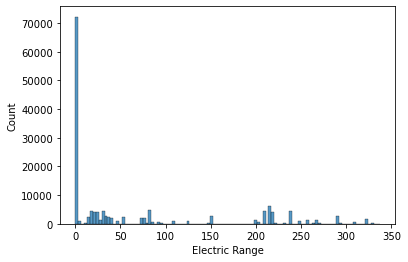

In [44]:
# We can use sns.histplot

sns.histplot(data=ev_data_with_zcta, x="Electric Range")

<h3><a class="anchor" id="presentable">Making Graphs Presentable</a></h3>

As we can see, there are numerous issues immediately with this histogram. One thing we may not have noticed before is just how many vehicles had an `"Electric Range"` of 0... this is a good sign to drop those.

The plot also isn't very nice... let's do some work to make it look better by implementing the following:
* Dropping 0 values
* Making the plot bigger
* Adding a descriptive title
* Eliminating excess cell output (`<AxesSubplot:xlabel='Electric Range', ylabel='Count'>`)
* Make the labels bigger

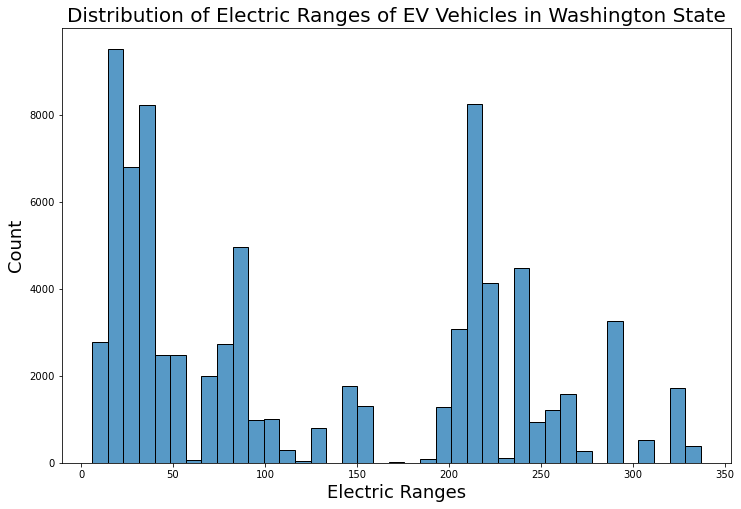

In [45]:
# Drop 0 values
ev_data_final = ev_data_with_zcta[ev_data_with_zcta["Electric Range"] > 0]

# Make the plot bigger
plt.figure(figsize=(12, 8)) 

# Make the plot
fig = sns.histplot(data=ev_data_final, x="Electric Range")

# Add a descriptive title
plt.title("Distribution of Electric Ranges of EV Vehicles in Washington State", fontsize=20)

# Make the labels bigger
plt.xlabel("Electric Ranges", fontsize=18)
plt.ylabel("Count", fontsize=18)

# Limit excess output by adding a semicolon
plt.show();

In general, every graph should have the following aspects:
1. A color theme which is easy to decipher, including for individuals who are colorblind (default to `viridis` for this)
2. A descriptive title clearly indicating the meaning of the graph
3. Appropriate X and Y labels describing what each of them are
4. A legend, if necessary
5. An appropriate size for labels, bins, and the graph itself

A lot of being able to do this right comes down to reading the documentation... but one particularly important sixth aspect is:

6. Avoidance of overplotting

<h3><a class="anchor" id="overplotting">Overplotting</a></h3>

Overplotting is when there is too much data on a graph to make it easily decipherable... let's look at some examples

What if we wanted to compare the distribution of `"Electric Range"` among cars of different `"Make"`?

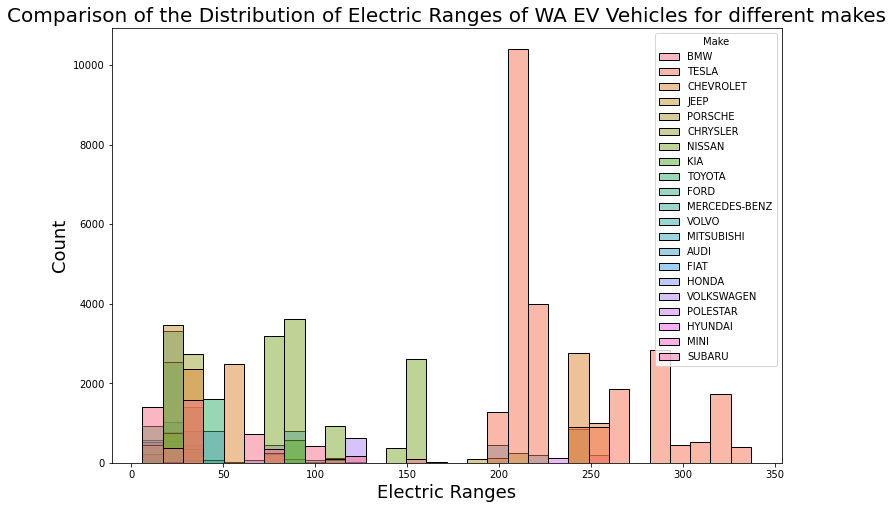

In [46]:
# Make the plot bigger
plt.figure(figsize=(12, 8)) 

# Make the plot
fig = sns.histplot(data=ev_data_final, x="Electric Range", hue="Make", bins=30)

# Add a descriptive title
plt.title("Comparison of the Distribution of Electric Ranges of WA EV Vehicles for different makes", fontsize=20)

# Make the labels bigger
plt.xlabel("Electric Ranges", fontsize=18)
plt.ylabel("Count", fontsize=18)

# Limit excess output by adding a semicolon
plt.show();

To reduce overplotting, we have a few strategies... with a bar graph, we can try two things usually: reduce the number of bins OR reduce the number of `'hue'` (notice that most of these companies don't have many cars) 

Let's try plotting where we only get the top three make types

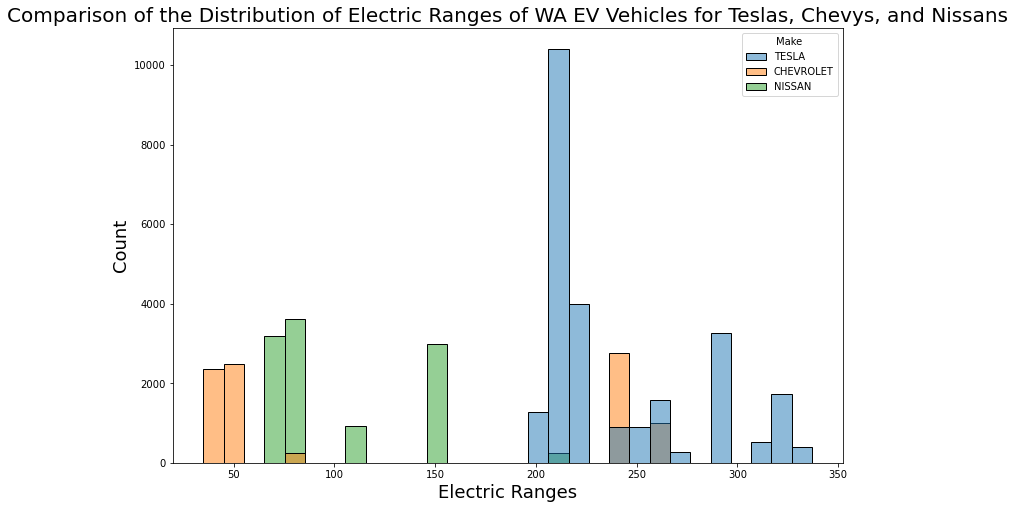

In [47]:
ev_top3 = ev_data_final[ev_data_final["Make"].isin(["TESLA", "CHEVROLET", "NISSAN"])]

# Make the plot bigger
plt.figure(figsize=(12, 8)) 

# Make the plot
fig = sns.histplot(data=ev_top3, x="Electric Range", hue="Make", bins=30)

# Add a descriptive title
plt.title("Comparison of the Distribution of Electric Ranges of WA EV Vehicles for Teslas, Chevys, and Nissans", fontsize=20)

# Make the labels bigger
plt.xlabel("Electric Ranges", fontsize=18)
plt.ylabel("Count", fontsize=18)

# Limit excess output by adding a semicolon
plt.show();

Overplotting is perhaps the most apparent when we make a scatterplot that's overplotted

Let's import a new dataset containing data from the US Census (we actually used this data in a PCS project for Link Health)

In [48]:
census_data = pd.read_csv('./census_data.csv')
census_data

ZCTA  Households with Broadband Internet Access (%)  \
0      16411                                          0.881   
1       8887                                          0.930   
2      48324                                          0.958   
3      56074                                          0.864   
4      70819                                          0.811   
...      ...                                            ...   
22293  79104                                          0.799   
22294  26164                                          0.777   
22295  21710                                          0.895   
22296  47904                                          0.819   
22297  43066                                          0.824   

       Households with a Computer (%)  \
0                               0.947   
1                               0.942   
2                               0.978   
3                               0.945   
4                               0.892   
...                               ...   
22293                           0.954   
22294                           0.793   
22295                           0.938   
22296                           0.920   
22297                           0.970   

       Individuals in the Noninstitutionalized Population Between Age 18 and 64 with a Disability (%)  \
0                                                  0.047                                                
1                                                  0.094                                                
2                                                  0.069                                                
3                                                  0.132                                                
4                                                  0.279                                                
...                                                  ...                                                
22293                                              0.142                                                
22294                                              0.225                                                
22295                                              0.076                                                
22296                                              0.146                                                
22297                                              0.089                                                

       Individuals in the Noninstitutionalized Population with a Disability (%)  \
0                                                  0.081                          
1                                                  0.112                          
2                                                  0.093                          
3                                                  0.134                          
4                                                  0.244                          
...                                                  ...                          
22293                                              0.136                          
22294                                              0.251                          
22295                                              0.105                          
22296                                              0.150                          
22297                                              0.076                          

       Individuals in the Noninstitutionalized Population Under Age 18 with a Disability (%)  \
0                                                  0.098                                       
1                                                  0.047                                       
2                                                  0.018                                       
3                                                  0.069                                       
4                   

Let's now try plotting the relationship between `"Households with Broadband Internet Access (%)"` and `"Individuals in the Noninstitutionalized Population with a Disability (%)"`

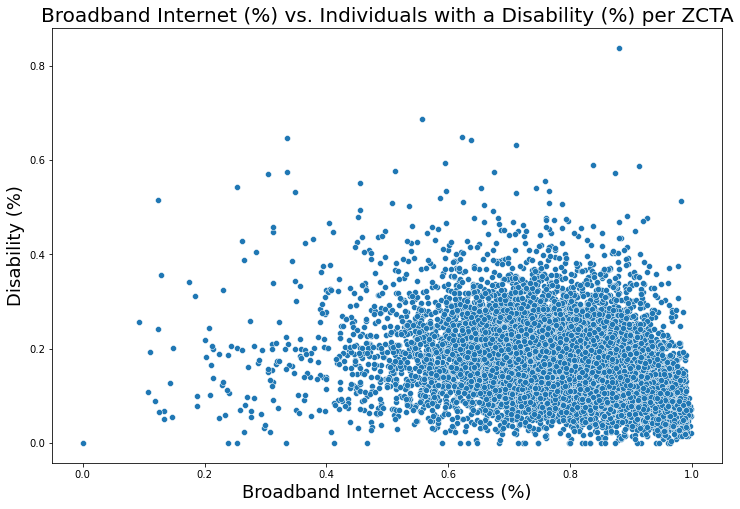

In [49]:
# Make the plot bigger
plt.figure(figsize=(12, 8)) 

# Make the scatterplot
sns.scatterplot(data=census_data,
                x="Households with Broadband Internet Access (%)",
                y="Individuals in the Noninstitutionalized Population with a Disability (%)")

# Add a descriptive title
plt.title("Broadband Internet (%) vs. Individuals with a Disability (%) per ZCTA", fontsize=20)

# Make the labels bigger
plt.xlabel("Broadband Internet Acccess (%)", fontsize=18)
plt.ylabel("Disability (%)", fontsize=18)

# Eliminate unecessary output
plt.show();

Wow! we have no idea what is going on -- not sure if the relationship is linear or if there is any relationship at all...

Here are some ways we can reduce overplotting for a scatterplot:

* If we have a high density of points, we can make a `hexbin` plot instead using `sns.jointplot` to show density

OR

* We can reduce the size of points
* We can reduce the opacity of points
* We can add 'jitter' to points which are on the same line

Let's try both

#### `hexbin` Plot [(documentation)](https://seaborn.pydata.org/examples/hexbin_marginals.html)

<Figure size 864x576 with 0 Axes>

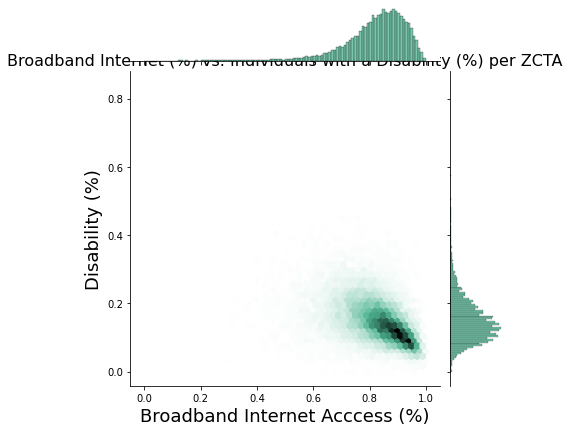

In [50]:
# Make the plot bigger
plt.figure(figsize=(12, 8)) 

sns.jointplot(data=census_data,
              x="Households with Broadband Internet Access (%)", 
              y="Individuals in the Noninstitutionalized Population with a Disability (%)", 
              kind="hex", 
              color="#4CB391",
             )


# Add a descriptive title
plt.title("Broadband Internet (%) vs. Individuals with a Disability (%) per ZCTA", fontsize=16)

# Make the labels bigger
plt.xlabel("Broadband Internet Acccess (%)", fontsize=18)
plt.ylabel("Disability (%)", fontsize=18);

We're getting there, but there are still some poor plotting practices here:
* We can't read the title
* The graph is too small (it seems that `plt.figure()` didn't work)
* Most of our data is in one quarter of the graph
* The hexbins are too large-- we can be more granular

Let's use our resources to fix that (documentation, stack overflow, chatGPT)

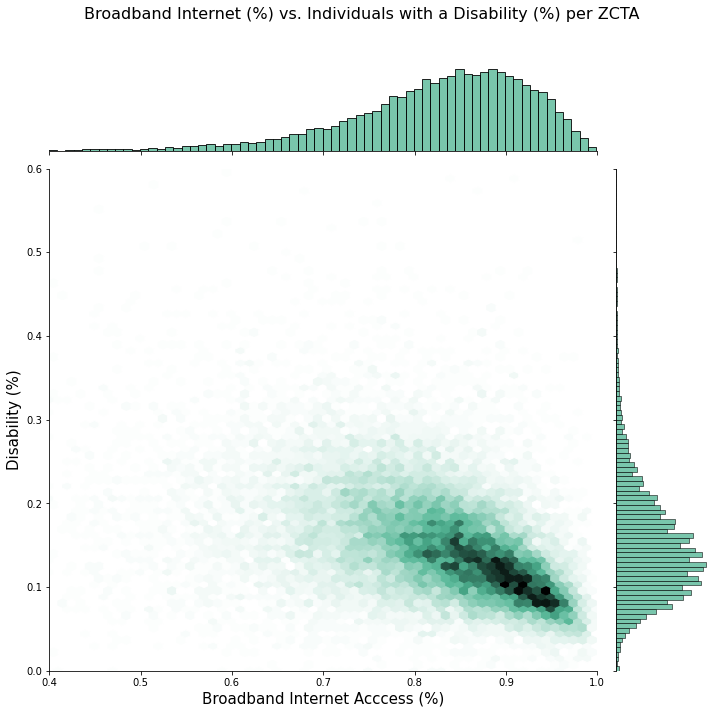

In [51]:
sns.jointplot(data=census_data,
              x="Households with Broadband Internet Access (%)", 
              y="Individuals in the Noninstitutionalized Population with a Disability (%)", 
              kind="hex", 
              color="#4CB391",
              height=10, # Manually increase the graph size from here
              xlim=(0.4, 1), # Shrink the axes so we focus in on the bulk of the data
              ylim=(0, 0.6), 
              gridsize=100 # Decrease the size of hexbins (by increasing the number of them) to add more granularity
             )


# Add a descriptive title
plt.suptitle("Broadband Internet (%) vs. Individuals with a Disability (%) per ZCTA", fontsize=16)
plt.subplots_adjust(top=0.9) #Add padding to the title so it doesn't overlap with the joint histogram

# Make the labels bigger
plt.xlabel("Broadband Internet Acccess (%)", fontsize=15)
plt.ylabel("Disability (%)", fontsize=15); #Limit unecessary output

#### Scatterplot (with a Regression Line)

This does a pretty good job showing our relationship, but if we really want a scatterplot, we can try implementing the feedback from above:

* *We can reduce the size of points*
* *We can reduce the opacity of points*
* *We can add 'jitter' to points which are on the same line*

I'll also add a regression line to help show the relationship

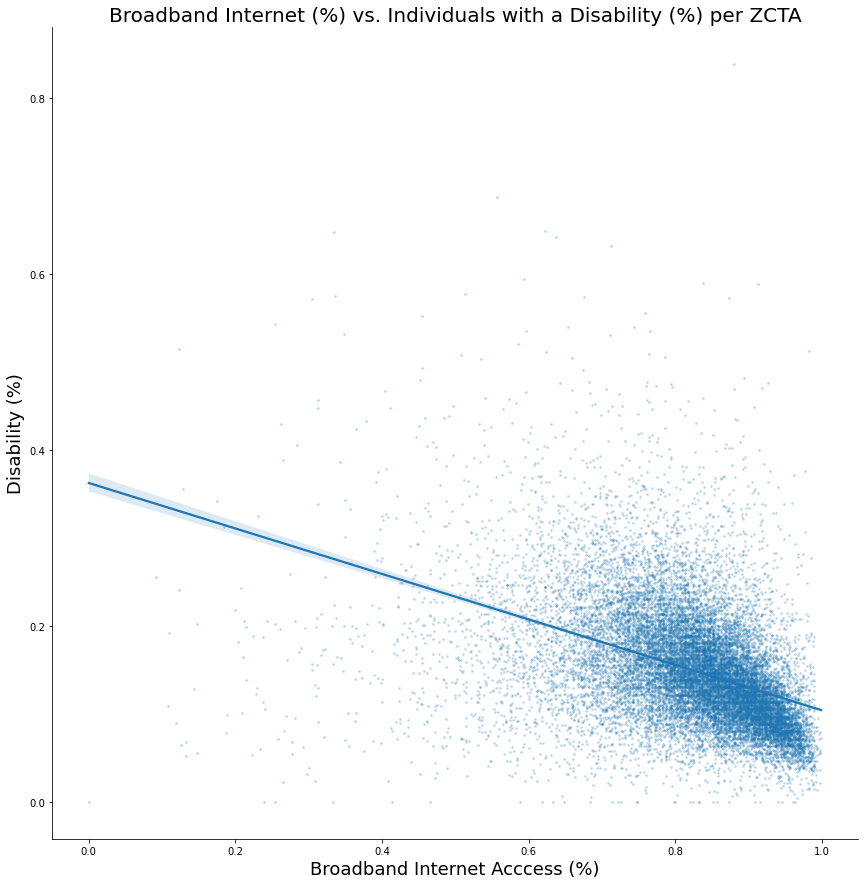

In [52]:
# Make the scatterplot
sns.lmplot(data=census_data,
                x="Households with Broadband Internet Access (%)",
                y="Individuals in the Noninstitutionalized Population with a Disability (%)",
                scatter_kws={
                             's': 3, 
                             'alpha': 0.2
                         },
                height=12
                )

# Add a descriptive title
plt.title("Broadband Internet (%) vs. Individuals with a Disability (%) per ZCTA", fontsize=20)

# Make the labels bigger
plt.xlabel("Broadband Internet Acccess (%)", fontsize=18)
plt.ylabel("Disability (%)", fontsize=18)

# Eliminate unecessary output
plt.show();

I would contend that the `hexbin` plot beats the `lmplot` here, but plotting is an art-- it's not meant to represent every point perfectly... it is meant to look presentable, be interpretable, and the means to get there doesn't matter as much

More importantly, when it comes to multilinear regression, it's means to understanding our data and helping draw (or train) the best conclusions from it. This is where we introduce the concept of... 

<h1><a class="anchor" id="regression">Multilinear Modeling, Gradient Descent, and Data Engineering</a></h1>

This is going to be quite the hefty section... so in this section we will cover the following:
* Simple Linear Regression (SLR)
* Model Evaluation (RMSE, Train-Test Split)
* Error minimization (gradient descent)
* Multilinear Regression (OLS)
* Data Engineering
* Model Overfitting
* Validation

<h3><a class="anchor" id="slr">Simple Linear Regression (SLR)</a></h3>

We've all seen scatterplots before and done some simple linear regression-- where we try to predict an Y outcome from an X input... let's use some dummy data for this section

We will also set up a helper function to make scatterplots more nicely

In [192]:
dummy_data = pd.read_csv('dummy_data.csv')

def scatter(df, X, Y):
    """Helper function to scatter two variables against eachother with good formatting
    
    Parameters
    ----------
    df: DataFrame
        The source data
    X: str
        The X column name
    y: str
        The Y column name
    
    Return Value
    ------------
    None
    """
    
    sns.lmplot(data=df,
                x=X,
                y=Y,
                height=8,
                ci=None
                )
    plt.title(f"{X} vs. {Y}", fontsize=20)
    plt.show();

dummy_data

Y1    X1      X2 X3 X4
0    1.2  2.09    1.15  A  M
1    2.5  2.70    1.20  A  M
2    3.6  3.00    1.41  A  M
3    5.0  3.30    1.65  B  N
4    7.5  3.78    2.01  B  N
5    9.6  4.15    2.51  B  N
6   12.3  4.30    3.11  C  P
7   15.8  5.01    4.60  B  P
8   19.9  5.56    6.61  B  P
9   25.0  6.40   10.50  C  P
10  31.2  6.50   19.10  C  P
11  38.5  7.20   41.10  C  P
12  46.9  7.71   84.80  C  P
13  56.4  8.76  216.01  C  P

Let's take a look at the relationship between `X1` and `Y1` using our helper function!

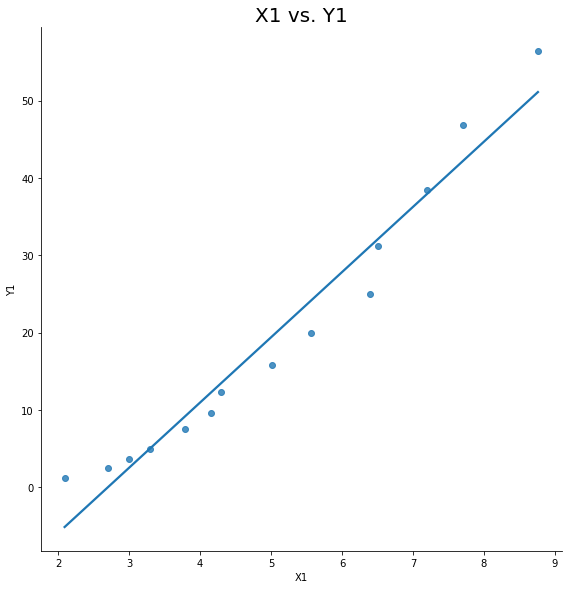

In [193]:
scatter(dummy_data, "X1", "Y1")

As we can see, we have a positive relationship between `X1` and `Y1`... We could try to predict `Y1` from `X1`, but how do we know how to? We can set up the equation as follows:

$$\huge \hat{Y_1} = \Theta_1 X_1 + \Theta_0$$

To find $\Theta_1$ and $\Theta_0$, we need some way of evaluating the model. This is where we introduce RMSE, or Root Mean Square Error

<h3><a class="anchor", id="rmse">Model Evaluation (RMSE, Train-Test Split)</a></h3>

In reality, we will never actually have all the data to base our predictions off of, or to "train" our model with. Let's simulate this by splitting up our dummy_data into a training set (for making the model) and a test set (for evaluating our model)

In [288]:
dd_train, dd_test = train_test_split(dummy_data, test_size=0.2, random_state=10)
dd_train

Y1    X1      X2 X3 X4
6   12.3  4.30    3.11  C  P
8   19.9  5.56    6.61  B  P
2    3.6  3.00    1.41  A  M
10  31.2  6.50   19.10  C  P
5    9.6  4.15    2.51  B  N
11  38.5  7.20   41.10  C  P
13  56.4  8.76  216.01  C  P
1    2.5  2.70    1.20  A  M
0    1.2  2.09    1.15  A  M
4    7.5  3.78    2.01  B  N
9   25.0  6.40   10.50  C  P

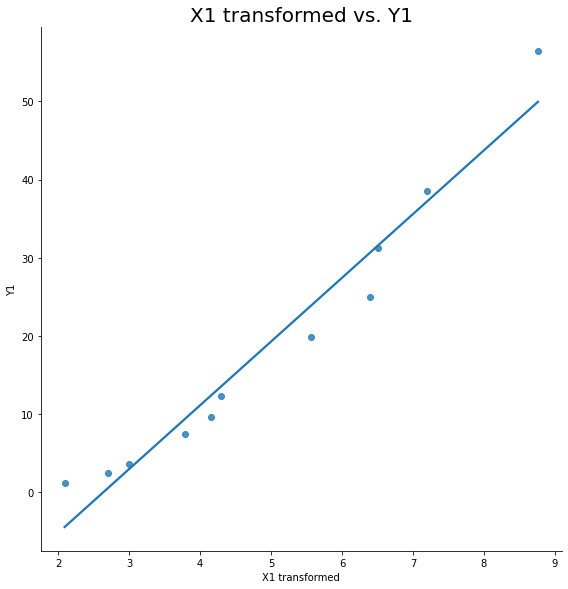

In [306]:
scatter(dd_train, "X1", "Y1")

Here, $\Theta_0$ is our intercept term... to entertain the idea of finding the best $\Theta_1$, I'll give the starting information that the idea $\Theta_0$ is roughly **-21.43**

We can evaluate our model using something called the Root Mean Square Error, or (RMSE).

Here is the formal equation:
$$\huge RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{(Y - \hat{Y})^2}}$$

In [307]:
# Our rmse definition

def rmse(actual_Y, predicted_Y):
    """Returns the root mean square error (RMSE) for an actual and predicted Y
    
    Parameters
    ----------
    actual_Y: arraylike<float>
        The actual Y values
    
    predicted_Y: arraylike<float>
        The predicted Y values
    
    Return Value
    ------------
    float
    """
    
    error = actual_Y - predicted_Y
    square_error = error ** 2
    mean_square_error = np.sum(square_error) / len(square_error)
    root_mean_square_error = np.sqrt(mean_square_error)
    return root_mean_square_error

To minimize our root mean square error, we want to make the predictions for Y as close as possible to our actual Y... let's also define a function which will return our predictions for Y

In [308]:
def predict(X, theta0, theta1):
    """Predicts X given a theta0 and theta1 value
    
    Parameters
    ----------
    X: arraylike<float>
        One dimensional X array
    
    theta0: float
        The intercept term
    
    theta1: float
        To be multiplied by X (X coefficient)
    
    Return Value
    ------------
    arraylike<float>
    """
    predictions = theta1 * X + theta0
    return predictions

Now, let's test out the root mean square error for $\Theta_1$ values from 6 to 11

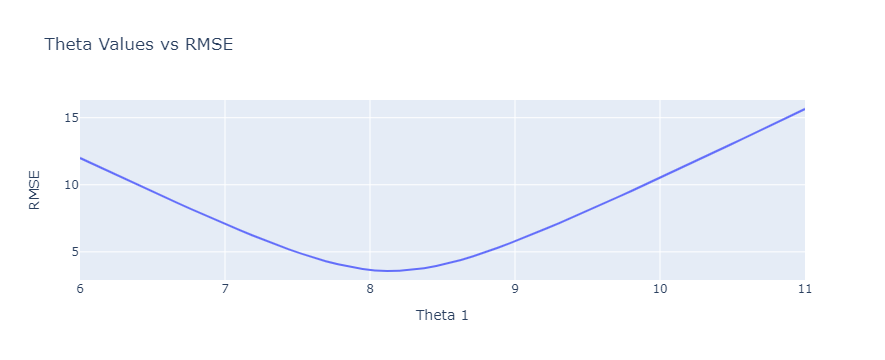

In [309]:
# Don't worry about the implementation of this code

test_thetas = np.linspace(start=6, stop=11, num=60)
error_vs_theta_1 = pd.DataFrame({"Theta 1":[], "RMSE":[]})
for theta in test_thetas:
    predictions = predict(dd_train["X1"], -21.43, theta)
    error = rmse(dd_train["Y1"], predictions)
    error_vs_theta_1 = error_vs_theta_1.append({"Theta 1": theta, "RMSE": error}, ignore_index=True)

px.line(error_vs_theta_1, x="Theta 1", y="RMSE", title="Theta Values vs RMSE")

So it looks like our ideal $\Theta_1$ value is roughly 8.15, giving us the equation:

$$\huge \hat{Y_1} = 8.15 (X_1) - 21.43$$

The question is though, how do we find this value mathematically? Here, we introduce the concept of gradient descent

<h3><a class="anchor" id="gd">Error Minimization (Gradient Descent)</a></h3>

If we want to find the minimum values mathematically for Theta 1, we can implement something called Gradient Descent, which is where we essentially make a function which will use the slope at certain points on the error line to find the minimum... To make it easier on us, remember that to minimize RMSE, we only need to minimize the Sum Square Error (SSE) part, which is the minimization of this:

$$\huge SSE = \Sigma_{i=1}^{n}{(Y_i - \hat{Y_i})^2}$$

This is equivalent to:

$$\huge SSE = \Sigma_{i=1}^{n}{(Y_i - (\Theta_1 X_i + \Theta_0))^2}$$

Since we know that $\Theta_0$ is -22.81, we have

$$\huge SSE = \Sigma_{i=1}^{n}{(Y_i - (\Theta_1 X_i - 22.81))^2}$$

And the partial derivative with respect to $\Theta_1$

$$\huge \frac{\partial}{\partial \Theta_1} = -2\Sigma_{i=1}^{n}X_i{(Y_i - (\Theta_1 X_i - 22.81))}$$

Now let's use this to implement gradient descent

In [310]:
# Sum Square Error
def sum_square_error(X, Y, theta_0, theta_1):
    predictions = predict(X, theta_0, theta_1)
    sse = np.sum((Y - predictions) ** 2)
    return sse

# Partial Derivative of SSE with Respect to Theta 1
def pd_t1_sse(X, Y, theta_0, theta_1):
    return -2 * np.sum(X * (Y - predict(X, theta_0, theta_1)))


# Gradient Descent
def gradient_descent_theta_1(X, Y, sse, pd_sse, start=0, alpha=1, max_iter=100):
    
    # Set a partial derivative limit
    limit = 0.0001
    
    # Find a theta value to start at
    curr_theta = start
    
    # Find the current partial derivative value
    curr_pd = pd_sse(X, Y, -21.43, curr_theta)
    
    #Find the curr sse
    curr_sse = sse(X, Y, -21.43, curr_theta)
    
    gd_log = pd.DataFrame({"Theta 1":[], "Sum Squared Error":[], "Partial Derivative":[]})
    gd_log = gd_log.append({"Theta 1": curr_theta, 
                                "Sum Squared Error": curr_sse, 
                                "Partial Derivative": curr_pd},
                               ignore_index=True)
    
    counter = 0
    while abs(curr_pd) > limit and counter < max_iter:
        # Find the desired X change
        step = alpha * curr_pd * -1
        
        # Update theta, sse, pd
        curr_theta = curr_theta + step
        old_pd = curr_pd
        curr_pd = pd_sse(X, Y, -21.43, curr_theta)
        if abs(old_pd) < abs(curr_pd):
            alpha = alpha / 2
        curr_sse = sse(X, Y, -21.843, curr_theta)
        gd_log = gd_log.append({"Theta 1": curr_theta, 
                                "Sum Squared Error": curr_sse, 
                                "Partial Derivative": curr_pd},
                               ignore_index=True)
        counter += 1
    
    print(f"The ideal theta value is {curr_theta}")
    return gd_log

In [311]:
gd_t1_log = gradient_descent_theta_1(dd_train["X1"], dd_train["Y1"], sum_square_error, pd_t1_sse, alpha=0.005)

The ideal theta value is 8.145562711073264


Looks like we got the right theta value!

Let's actually take a look at what the gradient descent is doing, visually

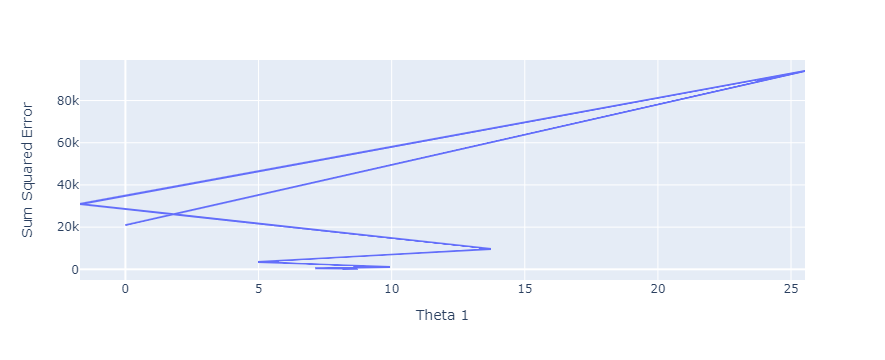

In [312]:
px.line(gd_t1_log, x="Theta 1", y="Sum Squared Error")

It turns out that gradient descent works for multiple variables too! We can implement it for as many variables as we would like because we are taking partial derivatives. Let's use it to find both coefficients for this model

In [316]:
def simple_gradient_descent(X, Y, start=0, alpha=1, max_iter=100):
    
    limit = 0.0001
    curr_theta_0 = start
    curr_theta_1 = start
    
    def partial_theta_0():
        return -2 * np.sum(Y - predict(X, curr_theta_0, curr_theta_1))
    
    def partial_theta_1():
        return -2 * np.sum(X * (Y - predict(X, curr_theta_0, curr_theta_1)))
    
    curr_sse = sum_square_error(X, Y, curr_theta_0, curr_theta_1)
    
    gd_log = pd.DataFrame(columns=["Theta 0", "Theta 1", "SSE"])
    gd_log = gd_log.append({"Theta 0": curr_theta_0,
                            "Theta 1": curr_theta_1,
                            "SSE": curr_sse},
                          ignore_index=True)
    
    curr_pd_0 = partial_theta_0()
    curr_pd_1 = partial_theta_1()
    alpha_0 = alpha
    alpha_1 = alpha
    
    counter = 0
    while (abs(curr_pd_0) > limit or abs(curr_pd_1) > limit) and counter < max_iter:
        
        t0_step = alpha_0 * curr_pd_0 * -1
        t1_step = alpha_1 * curr_pd_1 * -1
        
        curr_theta_0 = curr_theta_0 + t0_step
        curr_theta_1 = curr_theta_1 + t1_step
        
        old_pd_0 = curr_pd_0
        old_pd_1 = curr_pd_1
        
        curr_pd_0 = partial_theta_0()
        curr_pd_1 = partial_theta_1()
        
        if abs(old_pd_0) < abs(curr_pd_0):
            alpha_0 = alpha_0 / 2
            
        if abs(t0_step) < 0.08:
            alpha_0 = alpha_0 * 2
        
        if abs(t1_step) < 0.01:
            alpha_1 = alpha_1 * 2
        
        if abs(old_pd_1) < abs(curr_pd_1):
            alpha_1 = alpha_1 / 2
            
        curr_sse = sum_square_error(X, Y, curr_theta_0, curr_theta_1)
        
        gd_log = gd_log.append({"Theta 0": curr_theta_0,
                            "Theta 1": curr_theta_1,
                            "SSE": curr_sse},
                            ignore_index=True)
        
        counter += 1
        
    print(f"Theta 0: {curr_theta_0}")
    print(f"Theta 1: {curr_theta_1}")
    print(f"{Y.name} hat = {curr_theta_1} * {X.name} + {curr_theta_0}")
    
    return [curr_theta_0, curr_theta_1], gd_log

In [318]:
thetas, simple_gd_log = simple_gradient_descent(dd_train["X1"], dd_train["Y1"], max_iter=250)

Theta 0: -21.341731925864714
Theta 1: 8.15483322328262
Y1 hat = 8.15483322328262 * X1 + -21.341731925864714


In [324]:
simple_gd_log_demonstration = simple_gd_log[38:]
fig = px.line_3d(simple_gd_log_demonstration, x='Theta 0', y='Theta 1', z='SSE', title='Gradient Descent Convergence')
fig.update_layout(height=800, width=1000)
fig.show()

As you can see, implementing Gradient Descent is very difficult -- after significant tuning, I was only able to get mine to converge to values that were fairly close to the actual minimum

In extremely complicated models, there are more efficient, fine tuned, and accurate ways of implementing gradient descent (stochastic, batch, mini-batch, hyperparameter tuning, etc.) but this is the real deal... Even companies like OpenAI use gradient descent (error minimization techniques) to train their neural networks, and there is constantly new research being published on it. You may never need to actually implement it, but it is important to understand how it works.

<h3><a class="anchor" id="ols">Multiple Linear Regression (OLS)</a></h3>

So we don't have to implement gradient descent ourselves every time (or mathematically calculate the correct theta values, which is expensive!!), we have libraries made such as `sklearn`, which lets us easily train models

let's take a look with our dummy data again

In [325]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import OneHotEncoder

dd_train

Y1    X1      X2 X3 X4
6   12.3  4.30    3.11  C  P
8   19.9  5.56    6.61  B  P
2    3.6  3.00    1.41  A  M
10  31.2  6.50   19.10  C  P
5    9.6  4.15    2.51  B  N
11  38.5  7.20   41.10  C  P
13  56.4  8.76  216.01  C  P
1    2.5  2.70    1.20  A  M
0    1.2  2.09    1.15  A  M
4    7.5  3.78    2.01  B  N
9   25.0  6.40   10.50  C  P

In [326]:
simple_model = LinearRegression()
simple_model.fit(dd_train[["X1"]], dd_train["Y1"])
print(f"Theta 1: {simple_model.coef_[0]}")
print(f"Theta 0: {simple_model.intercept_}")
predictions = simple_model.predict(dd_train[['X1']])
print(f"Model Training Loss: {rmse(dd_train['Y1'], predictions)}")

Theta 1: 8.147189665940056
Theta 0: -21.439364128525153
Model Training Loss: 3.570277805721601


As you can see, this was nice and easy... it's built to quickly train multilinear models. In fact, we can add more parameters to it. We can train a model to predict $\hat{Y_1}$ on multiple variables:

$$\huge \hat{Y_1} = \Theta_2 X_2 + \Theta_1 X_1 + \Theta_0$$

In [327]:
multiple_model = LinearRegression()
multiple_model.fit(dd_train[["X1", "X2"]], dd_train["Y1"])
print(f"Theta 1: {multiple_model.coef_[0]}")
print(f"Theta 2: {multiple_model.coef_[1]}")
print(f"Theta 0: {multiple_model.intercept_}")
predictions = multiple_model.predict(dd_train[['X1', 'X2']])
multiple_loss_no_de = rmse(dd_train['Y1'], predictions)
print(f"Model Training Loss: {multiple_loss_no_de}")

Theta 1: 6.680035499763723
Theta 2: 0.06788317203908838
Theta 0: -16.058710359924344
Model Training Loss: 2.0969943646965095


As you can see, our model loss (RMSE) went down! The addition of $X_2$ seemed to help! You may have noticed earlier though that the relationship between Y and some of the X variables wasn't linear... let's take a look again

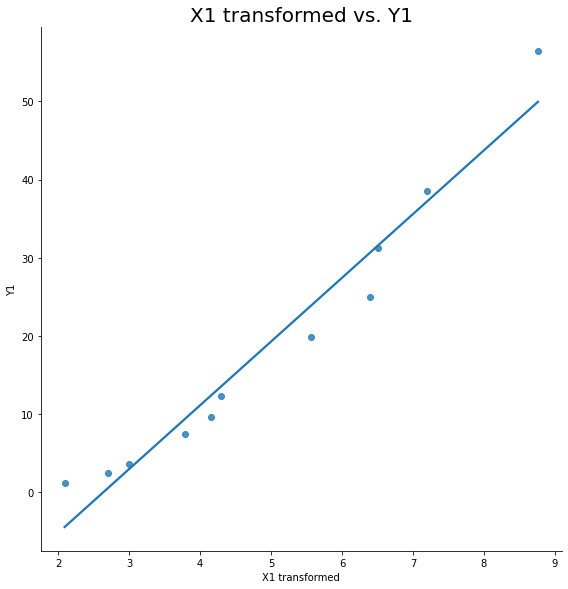

In [328]:
scatter(dd_train, "X1", "Y1")

We may actually be able to improve our model by making this relationship linear. This is where we introduce the idea of

<h3><a class="anchor" id="de">Data/Feature Engineering</a></h3>

Data/Feature Engineering is when we adjust our predictor variables to be more linear with our outcome variable-- or apply a 'transformation' to it. This could let us have a model which looks like this:

$$\huge \hat{Y_1} = \Theta_2 X_2 + \Theta_1 X_1^2 + \Theta_0$$

or

$$\huge \hat{Y_1} = \Theta_2 X_2 + \Theta_1 \sqrt{X_1} + \Theta_0$$

or

$$\huge \hat{Y_1} = \Theta_2 X_2 + \Theta_1 \log{X_1} + \Theta_0$$

It's up to us to figure out what the right transformation is

Let's start by adjusting our scatter function to take in an `X_transformation`

In [329]:
def scatter(df, X, Y, X_transformation=lambda x: x):
    """Helper function to scatter two variables against eachother with good formatting
    
    Parameters
    ----------
    df: DataFrame
        The source data
    X: str
        The X column name
    y: str
        The Y column name
    X_transformation: (x: arraylike<float>) -> arraylike<float>
        A transformation to apply to our X
        
    Return Value
    ------------
    None
    """
    df = df.copy()
    df[f"{X} transformed"] = X_transformation(df[X])
    sns.lmplot(data=df,
                x=f"{X} transformed",
                y=Y,
                height=8,
                ci=None
                )
    plt.title(f"{X} transformed vs. {Y}", fontsize=20)
    plt.show();

Our $X_1$ and $Y_1$ relationship looks curved. Perhaps $X_1^2$ would be a better predictor

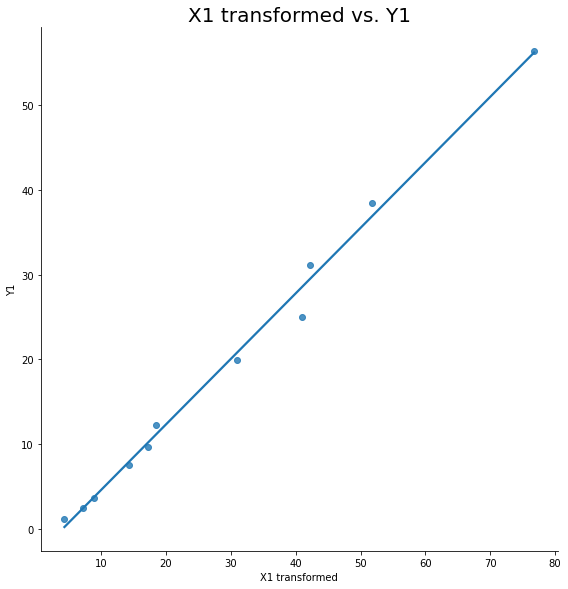

In [330]:
scatter(dd_train, "X1", "Y1", lambda x: x**2)

Ah that looks much better! Let's do the same for $X_2$ - to figure out if we need a transformation, we can look at the Bulge Diagram:

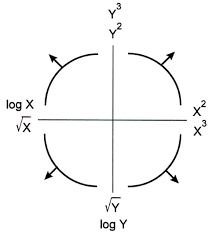

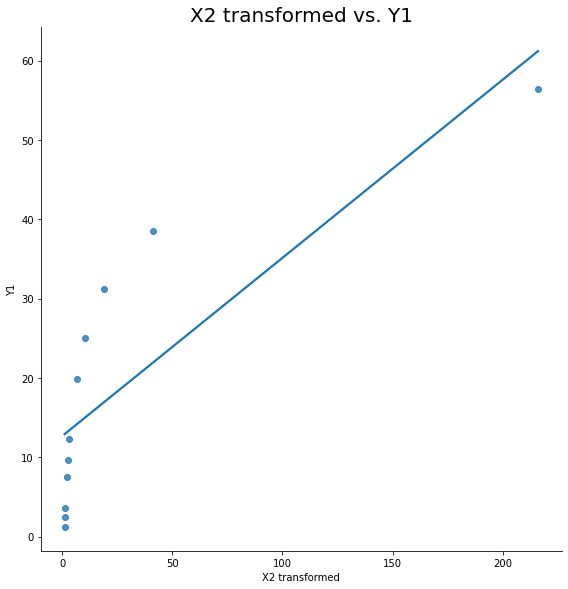

In [331]:
scatter(dd_train, "X2", "Y1")

Looking at our bulge diagram, it directs us to transform the data with $log(X)$ - let's try it

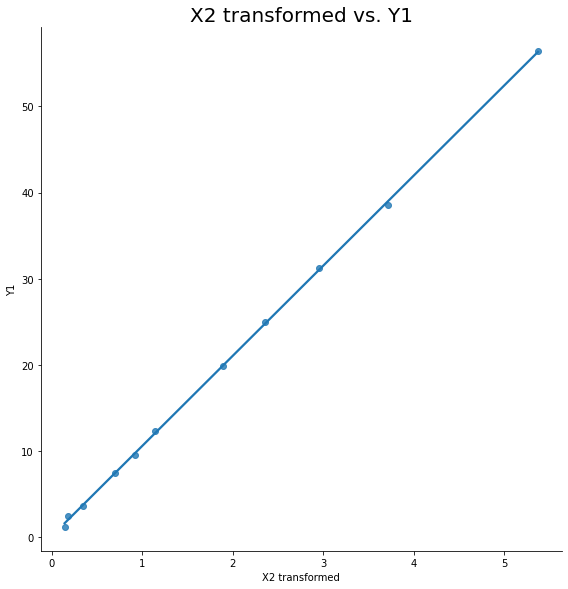

In [332]:
scatter(dd_train, "X2", "Y1", lambda x: np.log(x))

Wow! That's really linear-- let's try predicting our data based on $X_1^2$ and $\log{X_2}$

In [333]:
dd_train["X1^2"] = dd_train["X1"] ** 2
dd_train["log(X2)"] = np.log(dd_train["X2"])

engineered_model = LinearRegression()
engineered_model.fit(dd_train[["X1^2", "log(X2)"]], dd_train["Y1"])
engineered_predictions = engineered_model.predict(dd_train[["X1^2", "log(X2)"]])
multiple_loss_de = rmse(dd_train["Y1"], engineered_predictions)

print(f"Train RMSE Without Data Engineering: {multiple_loss_no_de}")
print(f"Train RMSE With Data Engineering: {multiple_loss_de}")

Train RMSE Without Data Engineering: 2.0969943646965095
Train RMSE With Data Engineering: 0.2479035448407535


Wow! That did wonders to predict our data more accurately-- let's take a look now at the results on our test data

In [334]:
dd_test["X1^2"] = dd_test["X1"] ** 2
dd_test["log(X2)"] = np.log(dd_test["X2"])

no_de_test_predictions = multiple_model.predict(dd_test[["X1", "X2"]])
de_test_predictions = engineered_model.predict(dd_test[["X1^2", "log(X2)"]])

no_de_test_rmse = rmse(dd_test["Y1"], no_de_test_predictions)
de_test_rmse = rmse(dd_test["Y1"], de_test_predictions)

print(f"Test RMSE Without Data Engineering: {no_de_test_rmse}")
print(f"Test RMSE With Data Engineering: {de_test_rmse}")

Test RMSE Without Data Engineering: 3.529541608256661
Test RMSE With Data Engineering: 0.47819631913705546


Looks like our data engineered model is better! This leads us to wonder... what if Y is best predicted by a combination of $X_1^2$ and $X_1$? Let's forget about X2 for now...

Let's try it

<h3><a class="anchor" id="overfitting">Overfitting</a></h3>

Let's compare the models

In [335]:
simple_model = LinearRegression()
simple_model.fit(dd_train[["X1^2"]], dd_train["Y1"])

additional_model = LinearRegression()
additional_model.fit(dd_train[["X1", "X1^2"]], dd_train["Y1"])

simple_predictions = simple_model.predict(dd_train[["X1^2"]])
simple_rmse = rmse(dd_train["Y1"], simple_predictions)

additional_predictions = additional_model.predict(dd_train[["X1", "X1^2"]])
additional_rmse = rmse(dd_train["Y1"], additional_predictions)

print(f"Training RMSE with only X1^2: {simple_rmse}")
print(f"Training RMSE with X1 and X1^2: {additional_rmse}")

Training RMSE with only X1^2: 1.3897816482296472
Training RMSE with X1 and X1^2: 1.3456150769646944


It seems like adding X1 as well improved our model even more! Let's take a look as our test RMSE decreases too...

In [336]:
test_simple_predictions = simple_model.predict(dd_test[["X1^2"]])
test_simple_rmse = rmse(dd_test["Y1"], test_simple_predictions)

test_additional_predictions = additional_model.predict(dd_test[["X1", "X1^2"]])
test_additional_rmse = rmse(dd_test["Y1"], test_additional_predictions)

print(f"Test RMSE with only X1^2: {test_simple_rmse}")
print(f"Test RMSE with X1 and X1^2: {test_additional_rmse}")

Test RMSE with only X1^2: 2.3588453813692265
Test RMSE with X1 and X1^2: 2.303173193661745


It looks like our test RMSE decreased again... we have to be careful through or we will run into an issue called **overfitting** - when the training of the model is too fit to the training data that it doesn't best predict the test data anymore. To better demonstrate this, let's create a crazy model as follows:

$$\huge \hat{Y_1} = \Theta_0 + \Theta_1 X_1 + \Theta_2 X_1^2 + ... \Theta_{12} X_1^{12}$$

In [337]:
feature_lst = ["X1"]
for x1_pow in range(2, 12):
    dd_train[f"X1^{x1_pow}"] = dd_train["X1"] ** x1_pow
    dd_test[f"X1^{x1_pow}"] = dd_test["X1"] ** x1_pow
    feature_lst.append(f"X1^{x1_pow}")

overfit_model = LinearRegression()
overfit_model.fit(dd_train[feature_lst], dd_train["Y1"])
overfit_train_predictions = overfit_model.predict(dd_train[feature_lst])
overfit_train_rmse = rmse(dd_train["Y1"], overfit_train_predictions)
print(f"Train RMSE with X1 through X1 ** 12: {overfit_train_rmse}")

Train RMSE with X1 through X1 ** 12: 2.7011427107974723e-05


Looks like we're getting near perfect predictions now! I wonder what our test error is

In [338]:
overfit_test_predictions = overfit_model.predict(dd_test[feature_lst])
overfit_test_rmse = rmse(dd_test["Y1"], overfit_test_predictions)
print(f"Test RMSE with X1 through X1 ** 13: {overfit_test_rmse}")

Test RMSE with X1 through X1 ** 13: 63.602865297570865


This is a great example of overfitting at work-- our test error is now crazy high. Let's actually look at what our model is predicting...

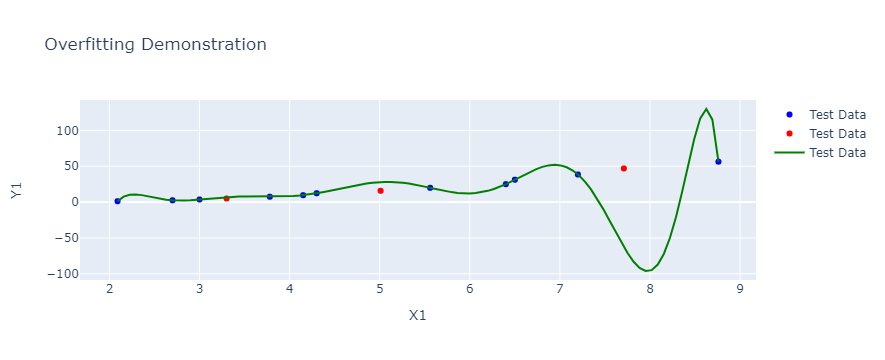

In [340]:
# Create a DataFrame for the curve data
curve_data = pd.DataFrame({"X1": x1_range})
for x1_pow in range(2, 13):
    curve_data[f"X1^{x1_pow}"] = x1_range ** x1_pow

# Predict Y1 values for the curve data using your overfit_model
curve_data["Predicted Y1"] = overfit_model.predict(curve_data[feature_lst])

# Create a scatter plot for the training data
fig = px.scatter(dd_train, x="X1", y="Y1", title="Overfitting Demonstration", labels={"X1": "X1", "Y1": "Y1"}, color_discrete_sequence=["blue"])

# Add a scatter plot for the test data as a new trace
fig.add_trace(px.scatter(dd_test, x="X1", y="Y1", color_discrete_sequence=["red"]).data[0])

# Add a line plot for the fitted curve as a new trace
fig.add_trace(px.line(curve_data, x="X1", y="Predicted Y1", color_discrete_sequence=["green"]).data[0])

# Add a legend
fig.update_traces(showlegend=True, name="Training Data", selector=dict(type='scatter'))
fig.update_traces(showlegend=True, name="Test Data", selector=dict(type='scatter'))
fig.update_traces(showlegend=True, name="Fitted Curve", selector=dict(type='line'))

fig.show()

See how the curve perfectly goes through all of our training data points, but it severly mispredicts our testing data? It is TOO well fit for our training data-- overfitting at work. We need to be careful when adding features to a model that we don't overfit our training data.

The problem is that we don't actually get to test on our testing data like we have been... In fact, most of the time, we will never see our testing data (imagine we are estimating the population of certain towns without a way to count it) - we want to make sure that our model can perform accurately on testing data, but without using testing data in the first place... here's how we do it

<h3><a class="anchor" id="validation">Validation</a></h3>

To simulate a test set, we can actually choose to break our training data into a "training set" and a "validation set"-- the validation set acts like the test data in that we don't use it to determine the optimal y values, but we can use it to determine the optimal parameters and hyperparameters.

It works like this:

* Training Set
    * Lets us determine the values (theta) that we multiply by different "features" (x values) in our DataFrame (design matrix)
    * Lets us observe the relationship between certain features and the outcome variable (X and Y) and determine if transformations are needed
* Validation Set 
    * Lets us check for overfitting comparing our model to the validation set
    * Should be roughly the same size as the training set
* Test Set
    * We will either never see the true outcome of the test set OR we will only ever get to test our model against it once
    * A test set can represent real world data for real products that are being shipped out (like ChatGPT)
    
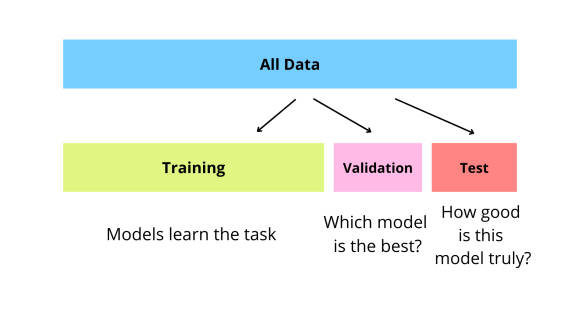

Let's try with our dummy data

In [342]:
dd_train, dd_val = train_test_split(dd_train, test_size=0.25)

dd_train

Y1    X1     X2 X3 X4     X1^2   log(X2)        X1^3         X1^4  \
1    2.5  2.70   1.20  A  M   7.2900  0.182322   19.683000    53.144100   
6   12.3  4.30   3.11  C  P  18.4900  1.134623   79.507000   341.880100   
5    9.6  4.15   2.51  B  N  17.2225  0.920283   71.473375   296.614506   
2    3.6  3.00   1.41  A  M   9.0000  0.343590   27.000000    81.000000   
8   19.9  5.56   6.61  B  P  30.9136  1.888584  171.879616   955.650665   
11  38.5  7.20  41.10  C  P  51.8400  3.716008  373.248000  2687.385600   
9   25.0  6.40  10.50  C  P  40.9600  2.351375  262.144000  1677.721600   
0    1.2  2.09   1.15  A  M   4.3681  0.139762    9.129329    19.080298   

            X1^5           X1^6          X1^7          X1^8          X1^9  \
1     143.489070     387.420489  1.046035e+03  2.824295e+03  7.625597e+03   
6    1470.084430    6321.363049  2.718186e+04  1.168820e+05  5.025926e+05   
5    1230.950201    5108.443334  2.120004e+04  8.798017e+04  3.651177e+05   
2     243.000000     729.000000  2.187000e+03  6.561000e+03  1.968300e+04   
8    5313.417697   29542.602396  1.642569e+05  9.132682e+05  5.077771e+06   
11  19349.176320  139314.069504  1.003061e+06  7.222041e+06  5.199870e+07   
9   10737.418240   68719.476736  4.398047e+05  2.814750e+06  1.801440e+07   
0      39.877822      83.344648  1.741903e+02  3.640578e+02  7.608807e+02   

           X1^10         X1^11  
1   2.058911e+04  5.559061e+04  
6   2.161148e+06  9.292937e+06  
5   1.515238e+06  6.288239e+06  
2   5.904900e+04  1.771470e+05  
8   2.823241e+07  1.569722e+08  
11  3.743906e+08  2.695612e+09  
9   1.152922e+08  7.378698e+08  
0   1.590241e+03  3.323603e+03

In [343]:
dd_val

Y1    X1      X2 X3 X4     X1^2   log(X2)        X1^3         X1^4  \
13  56.4  8.76  216.01  C  P  76.7376  5.375325  672.221376  5888.659254   
4    7.5  3.78    2.01  B  N  14.2884  0.698135   54.010152   204.158375   
10  31.2  6.50   19.10  C  P  42.2500  2.949688  274.625000  1785.062500   

            X1^5           X1^6          X1^7          X1^8          X1^9  \
13  51584.655063  451881.578351  3.958483e+06  3.467631e+07  3.037645e+08   
4     771.718656    2917.096519  1.102662e+04  4.168064e+04  1.575528e+05   
10  11602.906250   75418.890625  4.902228e+05  3.186448e+06  2.071191e+07   

           X1^10         X1^11  
13  2.660977e+09  2.331016e+10  
4   5.955497e+05  2.251178e+06  
10  1.346274e+08  8.750783e+08

Now let's train the model against our dummy data and see how many X values we need

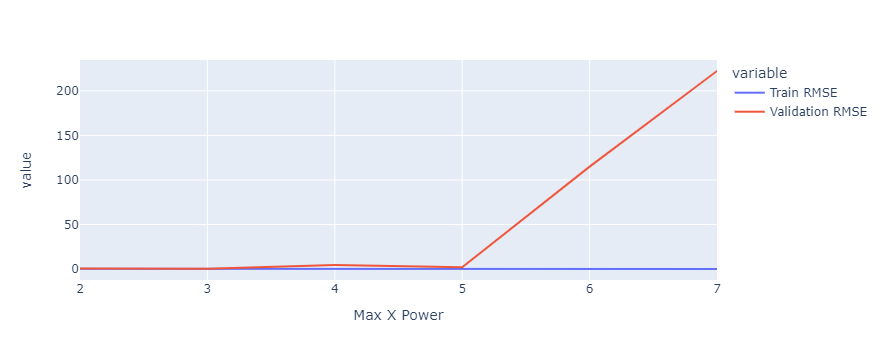

Train RMSE Validation RMSE
Max X Power                           
2.0           0.225322        0.597859
3.0           0.220192        0.351194
4.0           0.207715         4.40316
5.0           0.207444        1.852357
6.0                0.0      114.915091
7.0                0.0      222.317286

In [353]:
train_val_rmse = pd.DataFrame(columns=["Max X Power", "Train RMSE", "Validation RMSE"])

for max_pow in range(2, 8):
    features = ["X1", "log(X2)"]
    additional_features = [f"X1^{p}" for p in range(2, max_pow + 1)]
    features.extend(additional_features)
    tv_model = LinearRegression()
    tv_model.fit(dd_train[features], dd_train["Y1"])
    
    train_predictions = tv_model.predict(dd_train[features])
    val_predictions = tv_model.predict(dd_val[features])
    
    train_rmse = rmse(dd_train["Y1"], train_predictions)
    val_rmse = rmse(dd_val["Y1"], val_predictions)
    
    train_val_rmse = train_val_rmse.append({"Max X Power": max_pow, 
                                            "Train RMSE": train_rmse, 
                                            "Validation RMSE": val_rmse},
                                           ignore_index=True)

px.line(train_val_rmse, x="Max X Power", y=["Train RMSE", "Validation RMSE"]).show()
train_val_rmse.set_index("Max X Power")

We can clearly see the effects of overfitting here! It looks like our best max X power is going to be 3

Now let's redo the experiment with Test RMSE as an additional column

In [355]:
train_val_test_rmse = pd.DataFrame(columns=["Max X Power", "Train RMSE", "Validation RMSE",  "Test RMSE"])

for max_pow in range(2, 8):
    features = ["X1", "log(X2)"]
    additional_features = [f"X1^{p}" for p in range(2, max_pow + 1)]
    features.extend(additional_features)
    tvt_model = LinearRegression()
    tvt_model.fit(dd_train[features], dd_train["Y1"])
    
    train_predictions = tvt_model.predict(dd_train[features])
    val_predictions = tvt_model.predict(dd_val[features])
    test_predictions = tvt_model.predict(dd_test[features])
    
    train_rmse = rmse(dd_train["Y1"], train_predictions)
    val_rmse = rmse(dd_val["Y1"], val_predictions)
    test_rmse = rmse(dd_test["Y1"], test_predictions)
    
    train_val_test_rmse = train_val_test_rmse.append({"Max X Power": max_pow, 
                                            "Train RMSE": train_rmse, 
                                            "Validation RMSE": val_rmse,
                                            "Test RMSE": test_rmse},
                                           ignore_index=True)

train_val_test_rmse.set_index("Max X Power")

Train RMSE Validation RMSE  Test RMSE
Max X Power                                      
2.0           0.225322        0.597859   0.747096
3.0           0.220192        0.351194   0.659964
4.0           0.207715         4.40316   1.219095
5.0           0.207444        1.852357   0.941345
6.0                0.0      114.915091   9.494276
7.0                0.0      222.317286  14.837938

Even though we would never get to experiment like this with a real model, we can see that the validation set did an excellent job helping us determine what the best model for us is while avoiding overfitting and underfitting

We found that the best model is:

$$\huge \hat{Y_1} = \Theta_0 + \Theta_1 X_1 + \Theta_2 X_1^2 + \Theta_3 X_1^3 + \Theta_4 \log X_2$$

In reality, our modeling won't always have such clear relationships, will often have missing data, the validation set will still slightly misrepresent the test set, and there will be many more inconsistencies. But in general, as we increase our model complexity (add more predictor variables), our validation and test RMSE will decrease to a point, and then start to increase.

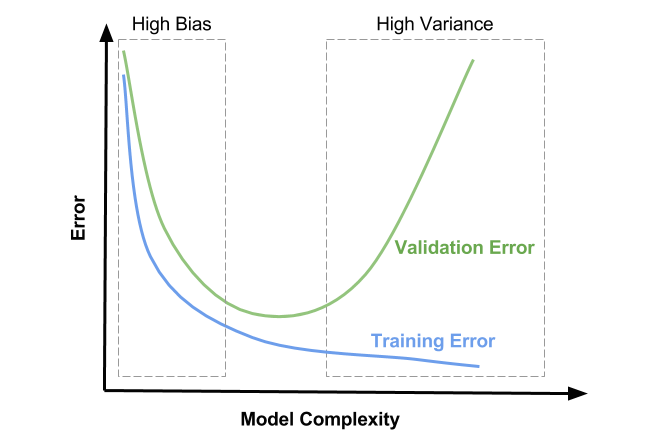

There are other ways to deal with overfitting that weren't included in this workshop like
* `k-fold cross validation`
* `LASSO` or `Ridge` regularization
* Hyperparameter tuning

If you are interested in learning about anything that was presented in this notebook, diving more into statistical tests with data, learning to use SQL, or how to create better multilinear models, DATA 100 is the course for you

Now, with the power of data at your hands, go do your own analyses and make a change!